In [129]:
import numpy as np
import quantities as pq
import matplotlib.pyplot as plt
import neo
from viziphant.rasterplot import rasterplot
from viziphant.events import add_event

# Loading data sets
To load the data sets, you need to use numpy. Don't forget the `allow_pickle=True` flag.

In [2]:
# Relative path to data (change to where you saved them)
path = './data/'

In [3]:
# load data

purple = np.load(path + 'purple.npy',
                        allow_pickle=True).item()

red = np.load(path + 'red.npy',
            allow_pickle=True).item()

blue = np.load(path + 'blue.npy',
            allow_pickle=True).item()

black = np.load(path + 'black.npy',
                     allow_pickle=True).item()

orange = np.load(path + 'orange.npy',
                       allow_pickle=True).item()

green = np.load(path + 'green.npy',
                            allow_pickle=True).item()

colors = ['purple', 'red', 'blue', 'black', 'orange', 'green']

# Explore neo structure
Now we look a bit at the neo structure of each file from one example dataset

In [4]:
# Choose dataset
np.random.seed(2021)
np.random.choice(colors)

'orange'

In [5]:
block = orange

In [6]:
# Get all the idxs of the successful trials
block.annotations['all_trial_ids'][0:10]


[6, 16, 17, 21, 22, 23, 24, 25, 28, 33]

In [7]:
# Select the first trial for reference
seg_idx = block.annotations['all_trial_ids'][0]
seg_idx

6

In [8]:
# Traverse the neo tree: start from the block
block

Block with 142 segments
annotations: {'all_trial_ids': [6,
   16,
   17,
   21,
   22,
   23,
   24,
   25,
   28,
   33,
   40,
   48,
   51,
   53,
   57,
   58,
   71,
   74,
   75,
   81,
   82,
   101,
   102,
   105,
   106,
   112,
   129,
   131,
   133,
   134,
   135,
   144,
   148,
   152,
   153,
   157,
   1,
   2,
   8,
   13,
   15,
   39,
   41,
   42,
   45,
   46,
   49,
   50,
   54,
   63,
   65,
   66,
   69,
   70,
   73,
   79,
   84,
   92,
   99,
   103,
   108,
   111,
   114,
   116,
   117,
   118,
   120,
   137,
   140,
   141,
   146,
   149,
   9,
   14,
   18,
   19,
   20,
   26,
   29,
   30,
   43,
   44,
   56,
   62,
   64,
   67,
   68,
   76,
   77,
   80,
   86,
   88,
   91,
   96,
   97,
   98,
   100,
   119,
   123,
   125,
   127,
   130,
   138,
   139,
   147,
   150,
   159,
   4,
   5,
   10,
   11,
   12,
   27,
   35,
   36,
   37,
   38,
   47,
   52,
   55,
   60,
   61,
   83,
   85,
   87,
   89,
   90,
   93,
   94,
   104,
   1

In [9]:
# The block has 142 segments, corresponding to the 142 successful trials (print only the first 10)
block.segments[0:10]

[Segment with 1 events, 156 spiketrains
 annotations: {'belongs_to_trialtype': 'PGHF', 'trial_id': 6}
 # analogsignals (N=0),
 Segment with 1 events, 156 spiketrains
 annotations: {'belongs_to_trialtype': 'PGHF', 'trial_id': 16}
 # analogsignals (N=0),
 Segment with 1 events, 156 spiketrains
 annotations: {'belongs_to_trialtype': 'PGHF', 'trial_id': 17}
 # analogsignals (N=0),
 Segment with 1 events, 156 spiketrains
 annotations: {'belongs_to_trialtype': 'PGHF', 'trial_id': 21}
 # analogsignals (N=0),
 Segment with 1 events, 156 spiketrains
 annotations: {'belongs_to_trialtype': 'PGHF', 'trial_id': 22}
 # analogsignals (N=0),
 Segment with 1 events, 156 spiketrains
 annotations: {'belongs_to_trialtype': 'PGHF', 'trial_id': 23}
 # analogsignals (N=0),
 Segment with 1 events, 156 spiketrains
 annotations: {'belongs_to_trialtype': 'PGHF', 'trial_id': 24}
 # analogsignals (N=0),
 Segment with 1 events, 156 spiketrains
 annotations: {'belongs_to_trialtype': 'PGHF', 'trial_id': 25}
 # analog

In [10]:
# Each segment has 156 spiketrains (print only the first 10)
block.segments[0].spiketrains[0:10]
block.segments[0].spiketrains[0].times.rescale('ms').magnitude
block.segments[0].spiketrains[0].t_start.rescale('ms').magnitude
block.segments[0].spiketrains[0].t_stop.rescale('ms').magnitude
block.segments[0].events[0].array_annotations
block.segments[0].events[0].array_annotations['trial_event_labels']

array(['TS-ON', 'WS-ON', 'CUE-ON', 'CUE-OFF', 'GO-ON', 'SR', 'OT', 'DO',
       'FSRplat-ON', 'HEplat-ON', 'FSRplat-OFF', 'HEplat-OFF', 'RW-ON',
       'RW-OFF', 'STOP', 'OBB', 'OR'], dtype='<U11')

In [160]:
block.segments[0].events[0].times

array([0.01      , 0.41226667, 0.81266667, 1.1144    , 2.11633333,
       2.33336667, 2.65036667, 2.67936667, 2.72536667, 2.81936667,
       2.97736667, 3.24936667, 3.28436667, 3.5714    , 3.57143333,
       3.75836667, 3.99336667]) * s

In [161]:
block.segments[0]

Segment with 1 events, 156 spiketrains
annotations: {'belongs_to_trialtype': 'PGHF', 'trial_id': 6}
# analogsignals (N=0)

In [12]:
# So to get the spiketrains of the first trial we can do
sts = block.segments[0].spiketrains

In [18]:
# We can also use the FILTER FUNCTION
# Get the list of spiketrains of the selected trial
sts = block.filter(
    targdict={'trial_id': seg_idx}, objects=neo.Segment)[0].spiketrains
sts[0:10]

[SpikeTrain
 annotations: {'unit_id': 1,
   'channel_id': 27,
   'connector_aligned_id': 69,
   'sua': True,
   'SNR': 7.0701111695,
   'spike_amplitude': 1035.30698697,
   'trial_id_st': 6,
   'belong_to_trialtype': 'PGHF'},
 SpikeTrain
 annotations: {'unit_id': 1,
   'channel_id': 91,
   'connector_aligned_id': 17,
   'sua': True,
   'SNR': 5.92184852345,
   'spike_amplitude': 520.744193039,
   'trial_id_st': 6,
   'belong_to_trialtype': 'PGHF'},
 SpikeTrain
 annotations: {'unit_id': 2,
   'channel_id': 71,
   'connector_aligned_id': 51,
   'sua': True,
   'SNR': 4.33582714471,
   'spike_amplitude': 695.296072508,
   'trial_id_st': 6,
   'belong_to_trialtype': 'PGHF'},
 SpikeTrain
 annotations: {'unit_id': 3,
   'channel_id': 26,
   'connector_aligned_id': 60,
   'sua': True,
   'SNR': 4.66647673551,
   'spike_amplitude': 612.358355023,
   'trial_id_st': 6,
   'belong_to_trialtype': 'PGHF'},
 SpikeTrain
 annotations: {'unit_id': 1,
   'channel_id': 88,
   'connector_aligned_id': 5,
 

In [13]:
# Look at the annotations of one spiketrain
sts[0].annotations

{'unit_id': 1,
 'channel_id': 27,
 'connector_aligned_id': 69,
 'sua': True,
 'SNR': 7.0701111695,
 'spike_amplitude': 1035.30698697,
 'trial_id_st': 6,
 'belong_to_trialtype': 'PGHF'}

In [14]:
# Look at the spiketimes of one spiketrain
sts[0].times

array([0.08706667, 0.23026667, 0.24973333, 0.32666667, 0.3544    ,
       0.35573333, 0.38766667, 0.4701    , 0.4879    , 0.5013    ,
       0.50366667, 0.64223333, 0.67646667, 0.7121    , 0.88826667,
       1.01016667, 1.01483333, 1.0424    , 1.17786667, 1.24253333,
       1.2547    , 1.38373333, 1.43586667, 1.5522    , 1.67016667,
       1.6895    , 1.73033333, 1.93676667, 2.0209    , 2.071     ,
       2.12543333, 2.13183333, 2.1471    , 2.15953333, 2.17836667,
       2.2277    , 2.25196667, 2.26936667, 2.2836    , 2.289     ,
       2.30723333, 2.3493    , 2.3566    , 2.3752    , 2.38606667,
       2.4184    , 2.54006667, 2.5519    , 2.56986667, 2.5846    ,
       2.60206667, 2.6075    , 2.6133    , 2.6619    , 2.66493333,
       2.67546667, 2.7492    , 2.78496667, 2.81576667, 2.84293333,
       2.97783333, 2.98673333, 3.14986667, 3.34663333, 3.3484    ,
       3.3961    , 3.40683333, 3.50316667, 3.58706667, 3.61426667,
       3.61866667, 3.79863333]) * s

In [15]:
# We can also use the `magnitude` attribute, i.e. array of spike times without unit
sts[0].magnitude

array([0.08706667, 0.23026667, 0.24973333, 0.32666667, 0.3544    ,
       0.35573333, 0.38766667, 0.4701    , 0.4879    , 0.5013    ,
       0.50366667, 0.64223333, 0.67646667, 0.7121    , 0.88826667,
       1.01016667, 1.01483333, 1.0424    , 1.17786667, 1.24253333,
       1.2547    , 1.38373333, 1.43586667, 1.5522    , 1.67016667,
       1.6895    , 1.73033333, 1.93676667, 2.0209    , 2.071     ,
       2.12543333, 2.13183333, 2.1471    , 2.15953333, 2.17836667,
       2.2277    , 2.25196667, 2.26936667, 2.2836    , 2.289     ,
       2.30723333, 2.3493    , 2.3566    , 2.3752    , 2.38606667,
       2.4184    , 2.54006667, 2.5519    , 2.56986667, 2.5846    ,
       2.60206667, 2.6075    , 2.6133    , 2.6619    , 2.66493333,
       2.67546667, 2.7492    , 2.78496667, 2.81576667, 2.84293333,
       2.97783333, 2.98673333, 3.14986667, 3.34663333, 3.3484    ,
       3.3961    , 3.40683333, 3.50316667, 3.58706667, 3.61426667,
       3.61866667, 3.79863333])

In [16]:
# List of event labels that we want to consider
event_name_to_plot = ['TS-ON', 'CUE-ON', 'GO-ON', 'SR', 'RW-ON']
# Get the list of events of the trial
all_events = block.filter(
    targdict={'trial_id': seg_idx}, objects=neo.Segment)[0].events[0]
all_events.times, all_events.array_annotations

(array([0.01      , 0.41226667, 0.81266667, 1.1144    , 2.11633333,
        2.33336667, 2.65036667, 2.67936667, 2.72536667, 2.81936667,
        2.97736667, 3.24936667, 3.28436667, 3.5714    , 3.57143333,
        3.75836667, 3.99336667]) * s,
 {'trial_id': array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]),
  'belongs_to_trialtype': array(['PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF',
         'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF',
         'PGHF'], dtype='<U4'),
  'trial_event_labels': array(['TS-ON', 'WS-ON', 'CUE-ON', 'CUE-OFF', 'GO-ON', 'SR', 'OT', 'DO',
         'FSRplat-ON', 'HEplat-ON', 'FSRplat-OFF', 'HEplat-OFF', 'RW-ON',
         'RW-OFF', 'STOP', 'OBB', 'OR'], dtype='<U11')})

In [167]:
# Get the most relevant events in trial
ev_idx = [i for i, val in enumerate(all_events.array_annotations['trial_event_labels']
                                   ) if val in set(event_name_to_plot)]
events = all_events[ev_idx]

In [18]:
#Look at their times
events.times

array([0.01      , 0.81266667, 2.11633333, 2.33336667, 3.28436667]) * s

In [19]:
#Look at their annotations
events.array_annotations

{'trial_id': array([6, 6, 6, 6, 6]),
 'belongs_to_trialtype': array(['PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF'], dtype='<U4'),
 'trial_event_labels': array(['TS-ON', 'CUE-ON', 'GO-ON', 'SR', 'RW-ON'], dtype='<U11')}

In [20]:
# Get the trial type
trial_type = block.filter(
    targdict={'trial_id': seg_idx}, objects=neo.Segment)[0].annotations[
    'belongs_to_trialtype']
trial_type

'PGHF'

# Make raster plot of all datasets

In [21]:
seg_idx = 6

purple_sts = purple.filter(
    targdict={'trial_id': seg_idx}, objects=neo.Segment)[0].spiketrains
red_sts = red.filter(
    targdict={'trial_id': int(seg_idx)}, objects=neo.Segment)[0].spiketrains
blue_sts = blue.filter(
    targdict={'trial_id': int(seg_idx)}, objects=neo.Segment)[0].spiketrains
black_sts = black.filter(
    targdict={'trial_id': int(seg_idx)}, objects=neo.Segment)[0].spiketrains
orange_sts = orange.filter(
    targdict={'trial_id': int(seg_idx)}, objects=neo.Segment)[0].spiketrains
green_sts = green.filter(
    targdict={'trial_id': int(seg_idx)}, objects=neo.Segment)[0].spiketrains

Text(0.5, 0.98, 'Rasterplot of one trial')

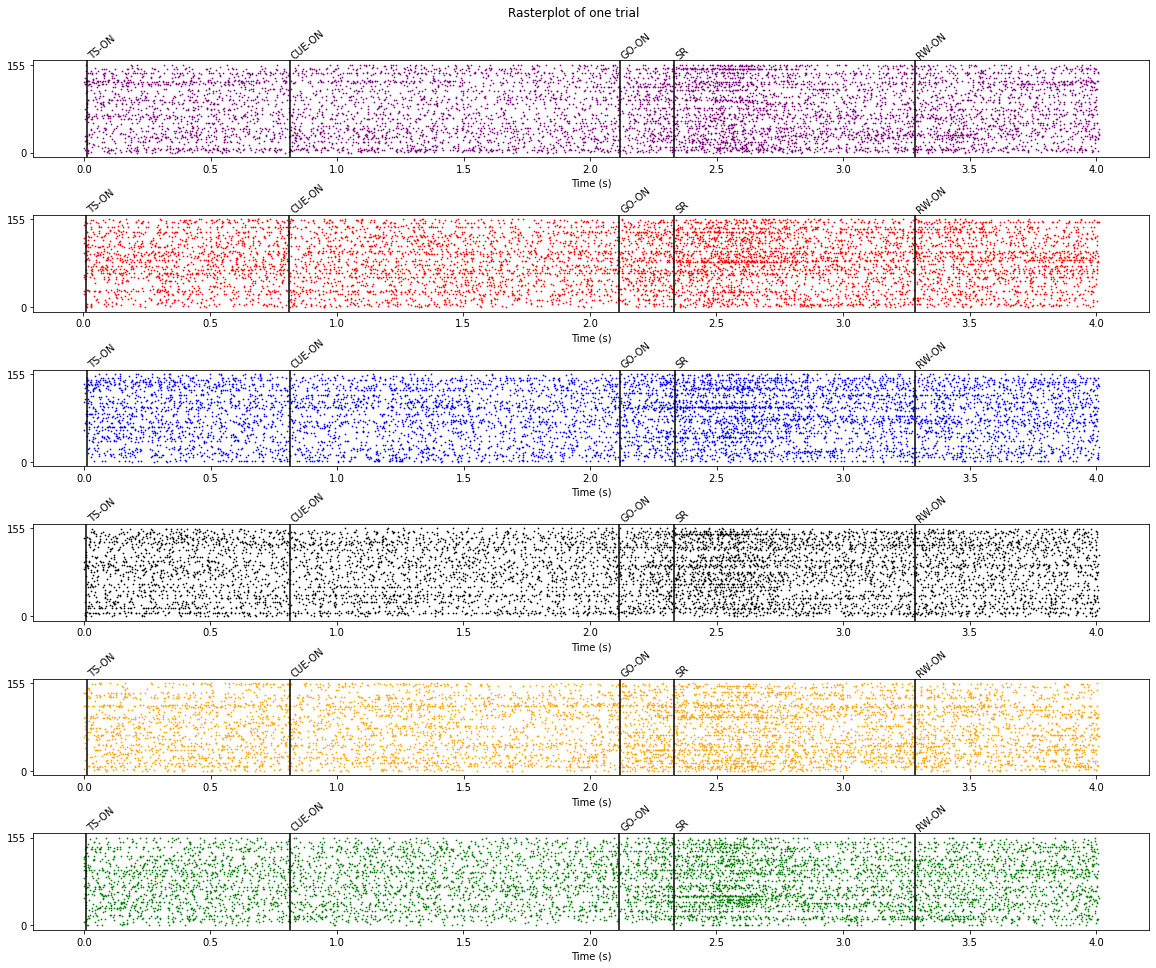

In [30]:
fig, axes = plt.subplots(6,1,figsize=(20,15))
fig.subplots_adjust(top=0.93, hspace=0.6)

markersize = 0.6

# #add labels to events
events.labels = event_name_to_plot

#plots
rasterplot(purple_sts, axes=axes[0], s=0.5, color='purple')
add_event(axes=axes[0], event=events, key=None)

rasterplot(red_sts, axes=axes[1], s=0.5, color='red')
add_event(axes=axes[1], event=events, key=None)

rasterplot(blue_sts, axes=axes[2], s=0.5, color='blue')
add_event(axes=axes[2], event=events, key=None)

rasterplot(black_sts, axes=axes[3], s=0.5, color='black')
add_event(axes=axes[3], event=events, key=None)

rasterplot(orange_sts, axes=axes[4], s=0.5, color='orange')
add_event(axes=axes[4], event=events, key=None)

rasterplot(green_sts, axes=axes[5], s=0.5, color='green')
add_event(axes=axes[5], event=events, key=None)

fig.suptitle('Rasterplot of one trial')

In [43]:
trial_ids = block.annotations['all_trial_ids']
print(len(trial_ids))
N_neurons = len(block.segments[0].spiketrains)
#print(type(N_neurons))
N_trials = len(trial_ids)
#block.segments[0].spiketrains[0].times.rescale('ms').magnitude #trial 0, 
# So to get the spiketrains of the first trial we can do
#sts = block.segments[0].spiketrains
sts = block.segments[0].spiketrains[0].times.rescale('ms').magnitude #trial0, neuron 0
print(sts)

142
<class 'int'>
[  87.06666667  230.26666667  249.73333333  326.66666667  354.4
  355.73333333  387.66666667  470.1         487.9         501.3
  503.66666667  642.23333333  676.46666667  712.1         888.26666667
 1010.16666667 1014.83333333 1042.4        1177.86666667 1242.53333333
 1254.7        1383.73333333 1435.86666667 1552.2        1670.16666667
 1689.5        1730.33333333 1936.76666667 2020.9        2071.
 2125.43333333 2131.83333333 2147.1        2159.53333333 2178.36666667
 2227.7        2251.96666667 2269.36666667 2283.6        2289.
 2307.23333333 2349.3        2356.6        2375.2        2386.06666667
 2418.4        2540.06666667 2551.9        2569.86666667 2584.6
 2602.06666667 2607.5        2613.3        2661.9        2664.93333333
 2675.46666667 2749.2        2784.96666667 2815.76666667 2842.93333333
 2977.83333333 2986.73333333 3149.86666667 3346.63333333 3348.4
 3396.1        3406.83333333 3503.16666667 3587.06666667 3614.26666667
 3618.66666667 3798.63333333]


In [68]:
#Put data into a matrix
ff = np.empty(N_neurons)
sp_count = np.empty(( N_neurons,N_trials))
ISI_mat = np.empty(N_trials)
CV2_mat = np.empty(( N_neurons,N_trials))
#sp_count_mean = np.empty((N_trials, N_neurons))
for n in range(N_neurons):
    
    for t in range(N_trials):
        #print(len(block.segments[t].spiketrains[n].times.rescale('ms').magnitude))
        sp_count[n,t] = len(block.segments[t].spiketrains[n].times.rescale('ms').magnitude)
        ISI = np.diff(block.segments[t].spiketrains[n].times.rescale('ms').magnitude)
        m = 0
        c = 0 
        for l in range(len(ISI)-1):
            c += 1
            m += 2*np.abs(ISI[l] - ISI[l-1])/(ISI[l] + ISI[l-1])
        if c != 0:     
            CV2 = m/c
            CV2_mat[n,t] = CV2
            #print(CV2)
    sp_count_mean = np.mean(sp_count[n,:])
    ff_num = np.std(sp_count[n,:])   
    ff[n] = ff_num/sp_count_mean


1.0008860272905546


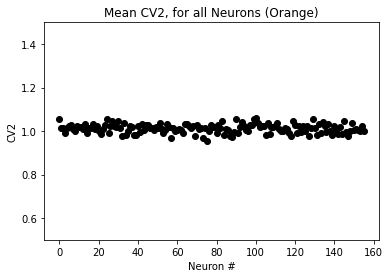

Text(0, 0.5, 'Frequency')

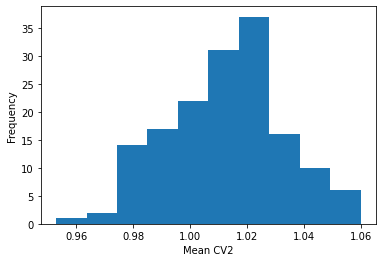

In [106]:
#Plot of Average CV2
mean_CV2 = np.empty(N_neurons)
for k in range(N_neurons):
    mean_CV2[k] = np.mean(CV2_mat[k,:])
    plt.scatter(k,np.mean(CV2_mat[k,:]), color = 'k') #looks like CV2 ~ 1, => Poisson?
plt.xlabel('Neuron #')
plt.ylabel('CV2')
plt.ylim([0.5,1.5])
plt.title('Mean CV2, for all Neurons (Orange)')
print(np.mean(CV2_mat[k,:]))
plt.show()

plt.hist(mean_CV2)
plt.xlabel('Mean CV2')
plt.ylabel('Frequency')

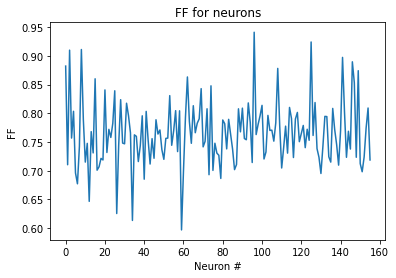

Text(0.5, 0, 'FF')

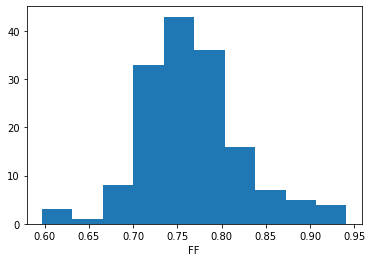

In [111]:
#FF plots
plt.plot(ff)
plt.xlabel('Neuron #')
plt.ylabel('FF')
plt.title('FF for neurons')
plt.show()
plt.hist(ff)
plt.xlabel('FF')

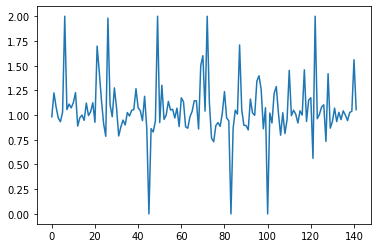

In [98]:
plt.plot(CV2_mat[0,:])

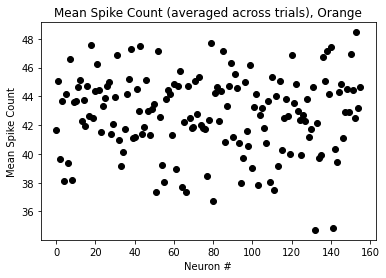

Text(0, 0.5, 'Frequency')

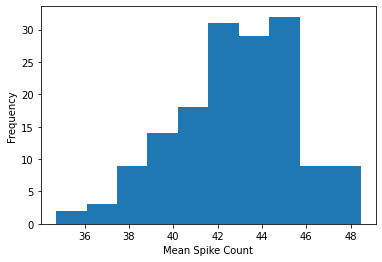

In [103]:
#Plot average spike count for all neurons
mean_SpCount = np.empty(N_neurons)
for k in range(N_neurons):
    plt.scatter(k,np.mean(sp_count[k,:]), color = 'k')
    mean_SpCount[k] = np.mean(sp_count[k,:])
plt.xlabel('Neuron #')
plt.ylabel('Mean Spike Count')
plt.title('Mean Spike Count (averaged across trials), Orange')
plt.show()
#Histogram
#mean_SpCount = np.mean(sp_count[k,:])
plt.hist(mean_SpCount)
plt.xlabel('Mean Spike Count')
plt.ylabel('Frequency')

In [22]:
def extract_spiketrains(block):
    # Collect unique unit identifiers for each segment/ trial
    unit_lists = []
    for trial in block.segments:
        # Create a string from channel ID and unit ID for each spike train in the trial
        unit_list = ['%d_%d' % (st.annotations['channel_id'], st.annotations['unit_id']) for st in trial.spiketrains]
        # Append as an array
        unit_lists.append(np.array(unit_list))
    # Sort channel_unit identifiers
    [ul.sort() for ul in unit_lists]
    # Confirm that all units are present across all trials 
    assert np.all([(ul == np.unique(np.concatenate(unit_lists))).all() for ul in unit_lists])
    # Make a single array of all units
    unit_list = np.unique(np.concatenate(unit_lists))
    print(unit_list)
    spiketrains = {}
    for unit in unit_list:
        # Separate channel and unit IDs
        channel_id, unit_id = unit.split('_')
        # Create a filter
        unit_filter = [dict(unit_id=int(unit_id)), dict(channel_id=int(channel_id))]
        # Take only spike trains from the neo block that match the filter
        spiketrains[unit] = block.filter(targdict=unit_filter, objects=neo.SpikeTrain)
    return spiketrains


In [32]:
# Collect unique unit identifiers for each segment/ trial
unit_lists = []
for trial in block.segments:
    # Create a string from channel ID and unit ID for each spike train in the trial
    unit_list = ['%d_%d' % (st.annotations['channel_id'], st.annotations['unit_id']) for st in trial.spiketrains]
    # Append as an array
    unit_lists.append(np.array(unit_list))
# Sort channel_unit identifiers
[ul.sort() for ul in unit_lists]
# Confirm that all units are present across all trials 
assert np.all([(ul == np.unique(np.concatenate(unit_lists))).all() for ul in unit_lists])
# Make a single array of all units
unit_list = np.unique(np.concatenate(unit_lists))
print(unit_list)

['10_1' '11_1' '11_2' '11_3' '12_1' '13_1' '13_2' '14_1' '14_2' '14_3'
 '15_1' '16_1' '16_2' '18_1' '18_2' '18_3' '18_4' '1_1' '1_2' '20_1'
 '21_1' '21_2' '22_1' '22_2' '22_3' '23_1' '24_1' '24_2' '26_1' '26_2'
 '26_3' '27_1' '27_2' '28_1' '28_2' '29_1' '2_1' '2_2' '30_1' '30_2'
 '30_3' '30_4' '31_1' '32_1' '32_2' '32_3' '33_1' '33_2' '33_3' '34_1'
 '36_1' '36_2' '38_1' '38_2' '3_1' '3_2' '40_1' '40_2' '41_1' '42_1'
 '42_2' '43_1' '43_2' '46_1' '48_1' '48_2' '48_3' '49_1' '4_1' '4_2'
 '50_1' '50_2' '52_1' '52_2' '52_3' '55_1' '55_2' '56_1' '56_2' '57_1'
 '58_1' '58_2' '59_1' '59_2' '5_1' '60_1' '60_2' '61_1' '61_2' '62_1'
 '62_2' '62_3' '62_4' '63_1' '63_2' '64_1' '64_2' '65_1' '65_2' '66_1'
 '66_2' '67_1' '68_1' '68_2' '69_1' '69_2' '6_1' '6_2' '71_1' '71_2'
 '72_1' '73_1' '73_2' '74_1' '74_2' '75_1' '75_2' '77_1' '77_2' '78_1'
 '78_2' '79_1' '79_2' '79_3' '7_1' '7_2' '80_1' '80_2' '81_1' '81_2'
 '83_1' '83_2' '85_1' '85_2' '86_1' '86_2' '88_1' '8_1' '8_2' '8_3' '90_1'
 '91_1' '91_2' 

In [23]:
# Collect spike trains for all trials for each unit
spiketrains = {}
for unit in unit_list:
    # Separate channel and unit IDs
    channel_id, unit_id = unit.split('_')
    # Create a filter
    unit_filter = [dict(unit_id=int(unit_id)), dict(channel_id=int(channel_id))]
    # Take only spike trains from the neo block that match the filter
    spiketrains[unit] = block.filter(targdict=unit_filter, objects=neo.SpikeTrain)
print(spiketrains)

NameError: name 'unit_list' is not defined

In [24]:
st_list = {}
cn = 0
for color in colors:
    block = eval(color)
    st_list[cn] = extract_spiketrains(block)
    cn +=1

['10_1' '11_1' '11_2' '11_3' '12_1' '13_1' '13_2' '14_1' '14_2' '14_3'
 '15_1' '16_1' '16_2' '18_1' '18_2' '18_3' '18_4' '1_1' '1_2' '20_1'
 '21_1' '21_2' '22_1' '22_2' '22_3' '23_1' '24_1' '24_2' '26_1' '26_2'
 '26_3' '27_1' '27_2' '28_1' '28_2' '29_1' '2_1' '2_2' '30_1' '30_2'
 '30_3' '30_4' '31_1' '32_1' '32_2' '32_3' '33_1' '33_2' '33_3' '34_1'
 '36_1' '36_2' '38_1' '38_2' '3_1' '3_2' '40_1' '40_2' '41_1' '42_1'
 '42_2' '43_1' '43_2' '46_1' '48_1' '48_2' '48_3' '49_1' '4_1' '4_2'
 '50_1' '50_2' '52_1' '52_2' '52_3' '55_1' '55_2' '56_1' '56_2' '57_1'
 '58_1' '58_2' '59_1' '59_2' '5_1' '60_1' '60_2' '61_1' '61_2' '62_1'
 '62_2' '62_3' '62_4' '63_1' '63_2' '64_1' '64_2' '65_1' '65_2' '66_1'
 '66_2' '67_1' '68_1' '68_2' '69_1' '69_2' '6_1' '6_2' '71_1' '71_2'
 '72_1' '73_1' '73_2' '74_1' '74_2' '75_1' '75_2' '77_1' '77_2' '78_1'
 '78_2' '79_1' '79_2' '79_3' '7_1' '7_2' '80_1' '80_2' '81_1' '81_2'
 '83_1' '83_2' '85_1' '85_2' '86_1' '86_2' '88_1' '8_1' '8_2' '8_3' '90_1'
 '91_1' '91_2' 

In [130]:
for k in range(len(st_list)):
    st = st_list[k]
    #block.segments[0].spiketrains[0].t_start.rescale('ms').magnitude #trial start time
    #block.segments[0].spiketrains[0].t_stop.rescale('ms').magnitude #trial end time
    key_list = list(st.keys())
    val_list = list(st.values())
    n = 0
    t = 1
    #print(val_list[n][t].times.rescale('ms').magnitude)
    #print(val_list[n][t].t_start.rescale('ms').magnitude)
    N_neurons = len(key_list)
    N_trials = len(st[key_list[0]])
    for n in range(N_neurons):
        for t in range(N_trials):
            t_dur = val_list[n][t].t_stop.rescale('ms').magnitude - val_list[n][t].t_start.rescale('ms').magnitude

            if t_dur != 4010.0:
                print("Dataset: " + str(k) +', Unit: ' +  key_list[n] + ', trial:' + str(t))
                print("Abnormal trial duration")


Dataset: 1, Unit: 10_1, trial:0
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:1
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:2
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:3
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:4
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:5
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:6
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:7
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:8
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:9
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:10
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:11
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:12
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:13
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:14
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:15
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:16
Abnormal trial duration
Dataset: 1, Unit: 10_1, trial:17
Abnormal

Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:117
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:118
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:119
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:120
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:121
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:122
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:123
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:124
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:125
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:126
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:127
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:128
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:129
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:130
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:131
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:132
Abnormal trial duration
Dataset: 1, Unit: 11_2, trial:133
Abnormal trial

Dataset: 1, Unit: 13_1, trial:44
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:45
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:46
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:47
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:48
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:49
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:50
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:51
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:52
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:53
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:54
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:55
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:56
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:57
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:58
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:59
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:60
Abnormal trial duration
Dataset: 1, Unit: 13_1, trial:6

Dataset: 1, Unit: 14_1, trial:128
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:129
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:130
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:131
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:132
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:133
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:134
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:135
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:136
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:137
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:138
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:139
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:140
Abnormal trial duration
Dataset: 1, Unit: 14_1, trial:141
Abnormal trial duration
Dataset: 1, Unit: 14_2, trial:0
Abnormal trial duration
Dataset: 1, Unit: 14_2, trial:1
Abnormal trial duration
Dataset: 1, Unit: 14_2, trial:2
Abnormal trial duration
Dataset: 1, Unit: 14

Dataset: 1, Unit: 15_1, trial:98
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:99
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:100
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:101
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:102
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:103
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:104
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:105
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:106
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:107
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:108
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:109
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:110
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:111
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:112
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:113
Abnormal trial duration
Dataset: 1, Unit: 15_1, trial:114
Abnormal trial duration
Dataset: 1, Unit

Dataset: 1, Unit: 18_1, trial:66
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:67
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:68
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:69
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:70
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:71
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:72
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:73
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:74
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:75
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:76
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:77
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:78
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:79
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:80
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:81
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:82
Abnormal trial duration
Dataset: 1, Unit: 18_1, trial:8

Dataset: 1, Unit: 18_4, trial:10
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:11
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:12
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:13
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:14
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:15
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:16
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:17
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:18
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:19
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:20
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:21
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:22
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:23
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:24
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:25
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:26
Abnormal trial duration
Dataset: 1, Unit: 18_4, trial:2

Dataset: 1, Unit: 1_2, trial:91
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:92
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:93
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:94
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:95
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:96
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:97
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:98
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:99
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:100
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:101
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:102
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:103
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:104
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:105
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:106
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:107
Abnormal trial duration
Dataset: 1, Unit: 1_2, trial:108
Abnorma

Dataset: 1, Unit: 21_2, trial:34
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:35
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:36
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:37
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:38
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:39
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:40
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:41
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:42
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:43
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:44
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:45
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:46
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:47
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:48
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:49
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:50
Abnormal trial duration
Dataset: 1, Unit: 21_2, trial:5

Dataset: 1, Unit: 22_2, trial:119
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:120
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:121
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:122
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:123
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:124
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:125
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:126
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:127
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:128
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:129
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:130
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:131
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:132
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:133
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:134
Abnormal trial duration
Dataset: 1, Unit: 22_2, trial:135
Abnormal trial duration
Dataset: 1, Un

Dataset: 1, Unit: 24_1, trial:75
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:76
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:77
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:78
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:79
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:80
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:81
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:82
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:83
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:84
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:85
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:86
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:87
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:88
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:89
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:90
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:91
Abnormal trial duration
Dataset: 1, Unit: 24_1, trial:9

Dataset: 1, Unit: 26_2, trial:24
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:25
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:26
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:27
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:28
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:29
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:30
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:31
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:32
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:33
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:34
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:35
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:36
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:37
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:38
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:39
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:40
Abnormal trial duration
Dataset: 1, Unit: 26_2, trial:4

Dataset: 1, Unit: 27_1, trial:109
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:110
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:111
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:112
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:113
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:114
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:115
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:116
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:117
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:118
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:119
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:120
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:121
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:122
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:123
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:124
Abnormal trial duration
Dataset: 1, Unit: 27_1, trial:125
Abnormal trial duration
Dataset: 1, Un

Dataset: 1, Unit: 28_2, trial:48
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:49
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:50
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:51
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:52
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:53
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:54
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:55
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:56
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:57
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:58
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:59
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:60
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:61
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:62
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:63
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:64
Abnormal trial duration
Dataset: 1, Unit: 28_2, trial:6

Dataset: 1, Unit: 2_1, trial:130
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:131
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:132
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:133
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:134
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:135
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:136
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:137
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:138
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:139
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:140
Abnormal trial duration
Dataset: 1, Unit: 2_1, trial:141
Abnormal trial duration
Dataset: 1, Unit: 2_2, trial:0
Abnormal trial duration
Dataset: 1, Unit: 2_2, trial:1
Abnormal trial duration
Dataset: 1, Unit: 2_2, trial:2
Abnormal trial duration
Dataset: 1, Unit: 2_2, trial:3
Abnormal trial duration
Dataset: 1, Unit: 2_2, trial:4
Abnormal trial duration
Dataset: 1, Unit: 2_2, trial:5
Abnormal t

Dataset: 1, Unit: 30_2, trial:87
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:88
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:89
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:90
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:91
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:92
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:93
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:94
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:95
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:96
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:97
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:98
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:99
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:100
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:101
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:102
Abnormal trial duration
Dataset: 1, Unit: 30_2, trial:103
Abnormal trial duration
Dataset: 1, Unit: 30_2, tri

Dataset: 1, Unit: 31_1, trial:42
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:43
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:44
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:45
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:46
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:47
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:48
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:49
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:50
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:51
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:52
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:53
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:54
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:55
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:56
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:57
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:58
Abnormal trial duration
Dataset: 1, Unit: 31_1, trial:5

Dataset: 1, Unit: 32_2, trial:117
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:118
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:119
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:120
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:121
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:122
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:123
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:124
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:125
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:126
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:127
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:128
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:129
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:130
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:131
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:132
Abnormal trial duration
Dataset: 1, Unit: 32_2, trial:133
Abnormal trial duration
Dataset: 1, Un

Dataset: 1, Unit: 33_2, trial:63
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:64
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:65
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:66
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:67
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:68
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:69
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:70
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:71
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:72
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:73
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:74
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:75
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:76
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:77
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:78
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:79
Abnormal trial duration
Dataset: 1, Unit: 33_2, trial:8

Dataset: 1, Unit: 36_1, trial:6
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:7
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:8
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:9
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:10
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:11
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:12
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:13
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:14
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:15
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:16
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:17
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:18
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:19
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:20
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:21
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:22
Abnormal trial duration
Dataset: 1, Unit: 36_1, trial:23
Ab

Dataset: 1, Unit: 38_1, trial:94
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:95
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:96
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:97
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:98
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:99
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:100
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:101
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:102
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:103
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:104
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:105
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:106
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:107
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:108
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:109
Abnormal trial duration
Dataset: 1, Unit: 38_1, trial:110
Abnormal trial duration
Dataset: 1, Unit: 38

Dataset: 1, Unit: 3_2, trial:52
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:53
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:54
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:55
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:56
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:57
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:58
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:59
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:60
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:61
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:62
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:63
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:64
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:65
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:66
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:67
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:68
Abnormal trial duration
Dataset: 1, Unit: 3_2, trial:69
Abnormal trial d

Dataset: 1, Unit: 41_1, trial:29
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:30
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:31
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:32
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:33
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:34
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:35
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:36
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:37
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:38
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:39
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:40
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:41
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:42
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:43
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:44
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:45
Abnormal trial duration
Dataset: 1, Unit: 41_1, trial:4

Dataset: 1, Unit: 42_2, trial:113
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:114
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:115
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:116
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:117
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:118
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:119
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:120
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:121
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:122
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:123
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:124
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:125
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:126
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:127
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:128
Abnormal trial duration
Dataset: 1, Unit: 42_2, trial:129
Abnormal trial duration
Dataset: 1, Un

Dataset: 1, Unit: 46_1, trial:61
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:62
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:63
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:64
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:65
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:66
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:67
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:68
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:69
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:70
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:71
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:72
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:73
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:74
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:75
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:76
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:77
Abnormal trial duration
Dataset: 1, Unit: 46_1, trial:7

Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:21
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:22
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:23
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:24
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:25
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:26
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:27
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:28
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:29
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:30
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:31
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:32
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:33
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:34
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:35
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:36
Abnormal trial duration
Dataset: 1, Unit: 48_3, trial:37
Abnormal trial duration
Dataset

Dataset: 1, Unit: 4_1, trial:101
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:102
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:103
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:104
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:105
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:106
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:107
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:108
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:109
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:110
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:111
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:112
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:113
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:114
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:115
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:116
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:117
Abnormal trial duration
Dataset: 1, Unit: 4_1, trial:11

Dataset: 1, Unit: 50_2, trial:27
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:28
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:29
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:30
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:31
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:32
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:33
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:34
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:35
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:36
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:37
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:38
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:39
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:40
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:41
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:42
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:43
Abnormal trial duration
Dataset: 1, Unit: 50_2, trial:4

Dataset: 1, Unit: 52_2, trial:97
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:98
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:99
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:100
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:101
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:102
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:103
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:104
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:105
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:106
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:107
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:108
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:109
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:110
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:111
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:112
Abnormal trial duration
Dataset: 1, Unit: 52_2, trial:113
Abnormal trial duration
Dataset: 1, Unit:

Dataset: 1, Unit: 55_2, trial:40
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:41
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:42
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:43
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:44
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:45
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:46
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:47
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:48
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:49
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:50
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:51
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:52
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:53
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:54
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:55
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:56
Abnormal trial duration
Dataset: 1, Unit: 55_2, trial:5

Dataset: 1, Unit: 56_2, trial:118
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:119
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:120
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:121
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:122
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:123
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:124
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:125
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:126
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:127
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:128
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:129
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:130
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:131
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:132
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:133
Abnormal trial duration
Dataset: 1, Unit: 56_2, trial:134
Abnormal trial duration
Dataset: 1, Un

Dataset: 1, Unit: 58_2, trial:43
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:44
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:45
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:46
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:47
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:48
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:49
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:50
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:51
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:52
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:53
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:54
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:55
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:56
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:57
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:58
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:59
Abnormal trial duration
Dataset: 1, Unit: 58_2, trial:6

Dataset: 1, Unit: 59_2, trial:124
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:125
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:126
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:127
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:128
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:129
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:130
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:131
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:132
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:133
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:134
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:135
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:136
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:137
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:138
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:139
Abnormal trial duration
Dataset: 1, Unit: 59_2, trial:140
Abnormal trial duration
Dataset: 1, Un

Dataset: 1, Unit: 60_2, trial:65
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:66
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:67
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:68
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:69
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:70
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:71
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:72
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:73
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:74
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:75
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:76
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:77
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:78
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:79
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:80
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:81
Abnormal trial duration
Dataset: 1, Unit: 60_2, trial:8

Dataset: 1, Unit: 62_1, trial:2
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:3
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:4
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:5
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:6
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:7
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:8
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:9
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:10
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:11
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:12
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:13
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:14
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:15
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:16
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:17
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:18
Abnormal trial duration
Dataset: 1, Unit: 62_1, trial:19
Abnorm

Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:90
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:91
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:92
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:93
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:94
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:95
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:96
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:97
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:98
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:99
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:100
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:101
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:102
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:103
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:104
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:105
Abnormal trial duration
Dataset: 1, Unit: 62_3, trial:106
Abnormal trial duration


Dataset: 1, Unit: 63_1, trial:5
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:6
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:7
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:8
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:9
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:10
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:11
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:12
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:13
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:14
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:15
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:16
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:17
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:18
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:19
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:20
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:21
Abnormal trial duration
Dataset: 1, Unit: 63_1, trial:22
Abn

Dataset: 1, Unit: 63_2, trial:6
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:7
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:8
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:9
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:10
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:11
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:12
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:13
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:14
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:15
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:16
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:17
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:18
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:19
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:20
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:21
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:22
Abnormal trial duration
Dataset: 1, Unit: 63_2, trial:23
Ab

Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:1
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:2
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:3
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:4
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:5
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:6
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:7
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:8
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:9
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:10
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:11
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:12
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:13
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:14
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:15
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:16
Abnormal trial duration
Dataset: 1, Unit: 64_2, trial:17
Abnormal trial duration
Dataset: 1, Unit

Dataset: 1, Unit: 65_1, trial:42
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:43
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:44
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:45
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:46
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:47
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:48
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:49
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:50
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:51
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:52
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:53
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:54
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:55
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:56
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:57
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:58
Abnormal trial duration
Dataset: 1, Unit: 65_1, trial:5

Dataset: 1, Unit: 66_1, trial:51
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:52
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:53
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:54
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:55
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:56
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:57
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:58
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:59
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:60
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:61
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:62
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:63
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:64
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:65
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:66
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:67
Abnormal trial duration
Dataset: 1, Unit: 66_1, trial:6

Dataset: 1, Unit: 66_2, trial:104
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:105
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:106
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:107
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:108
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:109
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:110
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:111
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:112
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:113
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:114
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:115
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:116
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:117
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:118
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:119
Abnormal trial duration
Dataset: 1, Unit: 66_2, trial:120
Abnormal trial duration
Dataset: 1, Un

Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:125
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:126
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:127
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:128
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:129
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:130
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:131
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:132
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:133
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:134
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:135
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:136
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:137
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:138
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:139
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:140
Abnormal trial duration
Dataset: 1, Unit: 67_1, trial:141
Abnormal trial

Dataset: 1, Unit: 68_2, trial:73
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:74
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:75
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:76
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:77
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:78
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:79
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:80
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:81
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:82
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:83
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:84
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:85
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:86
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:87
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:88
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:89
Abnormal trial duration
Dataset: 1, Unit: 68_2, trial:9

Dataset: 1, Unit: 6_1, trial:8
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:9
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:10
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:11
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:12
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:13
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:14
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:15
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:16
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:17
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:18
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:19
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:20
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:21
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:22
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:23
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:24
Abnormal trial duration
Dataset: 1, Unit: 6_1, trial:25
Abnormal trial dur

Dataset: 1, Unit: 71_1, trial:98
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:99
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:100
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:101
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:102
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:103
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:104
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:105
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:106
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:107
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:108
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:109
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:110
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:111
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:112
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:113
Abnormal trial duration
Dataset: 1, Unit: 71_1, trial:114
Abnormal trial duration
Dataset: 1, Unit

Dataset: 1, Unit: 73_1, trial:40
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:41
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:42
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:43
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:44
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:45
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:46
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:47
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:48
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:49
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:50
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:51
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:52
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:53
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:54
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:55
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:56
Abnormal trial duration
Dataset: 1, Unit: 73_1, trial:5

Dataset: 1, Unit: 74_2, trial:7
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:8
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:9
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:10
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:11
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:12
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:13
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:14
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:15
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:16
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:17
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:18
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:19
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:20
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:21
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:22
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:23
Abnormal trial duration
Dataset: 1, Unit: 74_2, trial:24
A

Dataset: 1, Unit: 75_2, trial:98
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:99
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:100
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:101
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:102
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:103
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:104
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:105
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:106
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:107
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:108
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:109
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:110
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:111
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:112
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:113
Abnormal trial duration
Dataset: 1, Unit: 75_2, trial:114
Abnormal trial duration
Dataset: 1, Unit

Dataset: 1, Unit: 78_1, trial:51
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:52
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:53
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:54
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:55
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:56
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:57
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:58
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:59
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:60
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:61
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:62
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:63
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:64
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:65
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:66
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:67
Abnormal trial duration
Dataset: 1, Unit: 78_1, trial:6

Dataset: 1, Unit: 79_2, trial:9
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:10
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:11
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:12
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:13
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:14
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:15
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:16
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:17
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:18
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:19
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:20
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:21
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:22
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:23
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:24
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:25
Abnormal trial duration
Dataset: 1, Unit: 79_2, trial:26

Dataset: 1, Unit: 7_1, trial:92
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:93
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:94
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:95
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:96
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:97
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:98
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:99
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:100
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:101
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:102
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:103
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:104
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:105
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:106
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:107
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:108
Abnormal trial duration
Dataset: 1, Unit: 7_1, trial:109
Abnorm

Dataset: 1, Unit: 80_2, trial:3
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:4
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:5
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:6
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:7
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:8
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:9
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:10
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:11
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:12
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:13
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:14
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:15
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:16
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:17
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:18
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:19
Abnormal trial duration
Dataset: 1, Unit: 80_2, trial:20
Abnor

Dataset: 1, Unit: 81_1, trial:50
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:51
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:52
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:53
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:54
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:55
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:56
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:57
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:58
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:59
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:60
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:61
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:62
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:63
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:64
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:65
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:66
Abnormal trial duration
Dataset: 1, Unit: 81_1, trial:6

Dataset: 1, Unit: 81_2, trial:78
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:79
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:80
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:81
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:82
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:83
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:84
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:85
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:86
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:87
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:88
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:89
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:90
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:91
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:92
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:93
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:94
Abnormal trial duration
Dataset: 1, Unit: 81_2, trial:9

Dataset: 1, Unit: 85_1, trial:25
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:26
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:27
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:28
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:29
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:30
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:31
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:32
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:33
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:34
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:35
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:36
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:37
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:38
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:39
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:40
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:41
Abnormal trial duration
Dataset: 1, Unit: 85_1, trial:4

Dataset: 1, Unit: 86_1, trial:96
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:97
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:98
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:99
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:100
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:101
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:102
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:103
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:104
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:105
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:106
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:107
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:108
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:109
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:110
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:111
Abnormal trial duration
Dataset: 1, Unit: 86_1, trial:112
Abnormal trial duration
Dataset: 1, Unit: 

Dataset: 1, Unit: 8_1, trial:35
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:36
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:37
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:38
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:39
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:40
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:41
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:42
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:43
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:44
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:45
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:46
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:47
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:48
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:49
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:50
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:51
Abnormal trial duration
Dataset: 1, Unit: 8_1, trial:52
Abnormal trial d

Dataset: 1, Unit: 8_3, trial:117
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:118
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:119
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:120
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:121
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:122
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:123
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:124
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:125
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:126
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:127
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:128
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:129
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:130
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:131
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:132
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:133
Abnormal trial duration
Dataset: 1, Unit: 8_3, trial:13

Dataset: 1, Unit: 91_2, trial:81
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:82
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:83
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:84
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:85
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:86
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:87
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:88
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:89
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:90
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:91
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:92
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:93
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:94
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:95
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:96
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:97
Abnormal trial duration
Dataset: 1, Unit: 91_2, trial:9

Dataset: 1, Unit: 92_2, trial:52
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:53
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:54
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:55
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:56
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:57
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:58
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:59
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:60
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:61
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:62
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:63
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:64
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:65
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:66
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:67
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:68
Abnormal trial duration
Dataset: 1, Unit: 92_2, trial:6

Dataset: 1, Unit: 93_2, trial:97
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:98
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:99
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:100
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:101
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:102
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:103
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:104
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:105
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:106
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:107
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:108
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:109
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:110
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:111
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:112
Abnormal trial duration
Dataset: 1, Unit: 93_2, trial:113
Abnormal trial duration
Dataset: 1, Unit:

Dataset: 1, Unit: 94_1, trial:129
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:130
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:131
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:132
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:133
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:134
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:135
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:136
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:137
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:138
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:139
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:140
Abnormal trial duration
Dataset: 1, Unit: 94_1, trial:141
Abnormal trial duration
Dataset: 1, Unit: 94_2, trial:0
Abnormal trial duration
Dataset: 1, Unit: 94_2, trial:1
Abnormal trial duration
Dataset: 1, Unit: 94_2, trial:2
Abnormal trial duration
Dataset: 1, Unit: 94_2, trial:3
Abnormal trial duration
Dataset: 1, Unit: 94_2

Dataset: 1, Unit: 95_1, trial:15
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:16
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:17
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:18
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:19
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:20
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:21
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:22
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:23
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:24
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:25
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:26
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:27
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:28
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:29
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:30
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:31
Abnormal trial duration
Dataset: 1, Unit: 95_1, trial:3

Dataset: 1, Unit: 95_2, trial:30
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:31
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:32
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:33
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:34
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:35
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:36
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:37
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:38
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:39
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:40
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:41
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:42
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:43
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:44
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:45
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:46
Abnormal trial duration
Dataset: 1, Unit: 95_2, trial:4

Dataset: 1, Unit: 95_3, trial:51
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:52
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:53
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:54
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:55
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:56
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:57
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:58
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:59
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:60
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:61
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:62
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:63
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:64
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:65
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:66
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:67
Abnormal trial duration
Dataset: 1, Unit: 95_3, trial:6

Dataset: 1, Unit: 9_1, trial:20
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:21
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:22
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:23
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:24
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:25
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:26
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:27
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:28
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:29
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:30
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:31
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:32
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:33
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:34
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:35
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:36
Abnormal trial duration
Dataset: 1, Unit: 9_1, trial:37
Abnormal trial d

Dataset: 2, Unit: 10_1, trial:102
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:103
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:104
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:105
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:106
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:107
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:108
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:109
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:110
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:111
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:112
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:113
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:114
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:115
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:116
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:117
Abnormal trial duration
Dataset: 2, Unit: 10_1, trial:118
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 11_3, trial:48
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:49
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:50
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:51
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:52
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:53
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:54
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:55
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:56
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:57
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:58
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:59
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:60
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:61
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:62
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:63
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:64
Abnormal trial duration
Dataset: 2, Unit: 11_3, trial:6

Dataset: 2, Unit: 13_1, trial:141
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:0
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:1
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:2
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:3
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:4
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:5
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:6
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:7
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:8
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:9
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:10
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:11
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:12
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:13
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:14
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:15
Abnormal trial duration
Dataset: 2, Unit: 13_2, trial:16
Abnorma

Dataset: 2, Unit: 14_2, trial:97
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:98
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:99
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:100
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:101
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:102
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:103
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:104
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:105
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:106
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:107
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:108
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:109
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:110
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:111
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:112
Abnormal trial duration
Dataset: 2, Unit: 14_2, trial:113
Abnormal trial duration
Dataset: 2, Unit:

Dataset: 2, Unit: 16_1, trial:49
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:50
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:51
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:52
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:53
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:54
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:55
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:56
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:57
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:58
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:59
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:60
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:61
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:62
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:63
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:64
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:65
Abnormal trial duration
Dataset: 2, Unit: 16_1, trial:6

Dataset: 2, Unit: 18_2, trial:1
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:2
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:3
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:4
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:5
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:6
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:7
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:8
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:9
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:10
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:11
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:12
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:13
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:14
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:15
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:16
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:17
Abnormal trial duration
Dataset: 2, Unit: 18_2, trial:18
Abnorma

Dataset: 2, Unit: 18_4, trial:103
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:104
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:105
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:106
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:107
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:108
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:109
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:110
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:111
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:112
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:113
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:114
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:115
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:116
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:117
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:118
Abnormal trial duration
Dataset: 2, Unit: 18_4, trial:119
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 20_1, trial:54
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:55
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:56
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:57
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:58
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:59
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:60
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:61
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:62
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:63
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:64
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:65
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:66
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:67
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:68
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:69
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:70
Abnormal trial duration
Dataset: 2, Unit: 20_1, trial:7

Dataset: 2, Unit: 22_1, trial:8
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:9
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:10
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:11
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:12
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:13
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:14
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:15
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:16
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:17
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:18
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:19
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:20
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:21
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:22
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:23
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:24
Abnormal trial duration
Dataset: 2, Unit: 22_1, trial:25


Dataset: 2, Unit: 22_3, trial:99
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:100
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:101
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:102
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:103
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:104
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:105
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:106
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:107
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:108
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:109
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:110
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:111
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:112
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:113
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:114
Abnormal trial duration
Dataset: 2, Unit: 22_3, trial:115
Abnormal trial duration
Dataset: 2, Uni

Dataset: 2, Unit: 24_2, trial:44
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:45
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:46
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:47
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:48
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:49
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:50
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:51
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:52
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:53
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:54
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:55
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:56
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:57
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:58
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:59
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:60
Abnormal trial duration
Dataset: 2, Unit: 24_2, trial:6

Dataset: 2, Unit: 26_2, trial:130
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:131
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:132
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:133
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:134
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:135
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:136
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:137
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:138
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:139
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:140
Abnormal trial duration
Dataset: 2, Unit: 26_2, trial:141
Abnormal trial duration
Dataset: 2, Unit: 26_3, trial:0
Abnormal trial duration
Dataset: 2, Unit: 26_3, trial:1
Abnormal trial duration
Dataset: 2, Unit: 26_3, trial:2
Abnormal trial duration
Dataset: 2, Unit: 26_3, trial:3
Abnormal trial duration
Dataset: 2, Unit: 26_3, trial:4
Abnormal trial duration
Dataset: 2, Unit: 26_3, 

Dataset: 2, Unit: 27_2, trial:85
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:86
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:87
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:88
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:89
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:90
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:91
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:92
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:93
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:94
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:95
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:96
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:97
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:98
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:99
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:100
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial:101
Abnormal trial duration
Dataset: 2, Unit: 27_2, trial

Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:59
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:60
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:61
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:62
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:63
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:64
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:65
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:66
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:67
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:68
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:69
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:70
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:71
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:72
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:73
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:74
Abnormal trial duration
Dataset: 2, Unit: 29_1, trial:75
Abnormal trial duration
Dataset

Dataset: 2, Unit: 30_1, trial:18
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:19
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:20
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:21
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:22
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:23
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:24
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:25
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:26
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:27
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:28
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:29
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:30
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:31
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:32
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:33
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:34
Abnormal trial duration
Dataset: 2, Unit: 30_1, trial:3

Dataset: 2, Unit: 30_3, trial:106
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:107
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:108
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:109
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:110
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:111
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:112
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:113
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:114
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:115
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:116
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:117
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:118
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:119
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:120
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:121
Abnormal trial duration
Dataset: 2, Unit: 30_3, trial:122
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 32_1, trial:63
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:64
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:65
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:66
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:67
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:68
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:69
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:70
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:71
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:72
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:73
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:74
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:75
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:76
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:77
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:78
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:79
Abnormal trial duration
Dataset: 2, Unit: 32_1, trial:8

Dataset: 2, Unit: 33_1, trial:10
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:11
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:12
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:13
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:14
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:15
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:16
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:17
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:18
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:19
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:20
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:21
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:22
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:23
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:24
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:25
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:26
Abnormal trial duration
Dataset: 2, Unit: 33_1, trial:2

Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:107
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:108
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:109
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:110
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:111
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:112
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:113
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:114
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:115
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:116
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:117
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:118
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:119
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:120
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:121
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:122
Abnormal trial duration
Dataset: 2, Unit: 33_3, trial:123
Abnormal trial

Dataset: 2, Unit: 36_2, trial:48
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:49
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:50
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:51
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:52
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:53
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:54
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:55
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:56
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:57
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:58
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:59
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:60
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:61
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:62
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:63
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:64
Abnormal trial duration
Dataset: 2, Unit: 36_2, trial:6

Dataset: 2, Unit: 38_2, trial:130
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:131
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:132
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:133
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:134
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:135
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:136
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:137
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:138
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:139
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:140
Abnormal trial duration
Dataset: 2, Unit: 38_2, trial:141
Abnormal trial duration
Dataset: 2, Unit: 3_1, trial:0
Abnormal trial duration
Dataset: 2, Unit: 3_1, trial:1
Abnormal trial duration
Dataset: 2, Unit: 3_1, trial:2
Abnormal trial duration
Dataset: 2, Unit: 3_1, trial:3
Abnormal trial duration
Dataset: 2, Unit: 3_1, trial:4
Abnormal trial duration
Dataset: 2, Unit: 3_1, trial:

Dataset: 2, Unit: 40_1, trial:77
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:78
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:79
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:80
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:81
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:82
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:83
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:84
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:85
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:86
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:87
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:88
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:89
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:90
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:91
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:92
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:93
Abnormal trial duration
Dataset: 2, Unit: 40_1, trial:9

Dataset: 2, Unit: 42_1, trial:34
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:35
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:36
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:37
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:38
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:39
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:40
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:41
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:42
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:43
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:44
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:45
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:46
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:47
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:48
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:49
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:50
Abnormal trial duration
Dataset: 2, Unit: 42_1, trial:5

Dataset: 2, Unit: 43_1, trial:120
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:121
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:122
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:123
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:124
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:125
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:126
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:127
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:128
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:129
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:130
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:131
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:132
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:133
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:134
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:135
Abnormal trial duration
Dataset: 2, Unit: 43_1, trial:136
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 48_1, trial:67
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:68
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:69
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:70
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:71
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:72
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:73
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:74
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:75
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:76
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:77
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:78
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:79
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:80
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:81
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:82
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:83
Abnormal trial duration
Dataset: 2, Unit: 48_1, trial:8

Dataset: 2, Unit: 49_1, trial:6
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:7
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:8
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:9
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:10
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:11
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:12
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:13
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:14
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:15
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:16
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:17
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:18
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:19
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:20
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:21
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:22
Abnormal trial duration
Dataset: 2, Unit: 49_1, trial:23
Ab

Dataset: 2, Unit: 4_2, trial:94
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:95
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:96
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:97
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:98
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:99
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:100
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:101
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:102
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:103
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:104
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:105
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:106
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:107
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:108
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:109
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:110
Abnormal trial duration
Dataset: 2, Unit: 4_2, trial:111
Abno

Dataset: 2, Unit: 52_1, trial:37
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:38
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:39
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:40
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:41
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:42
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:43
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:44
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:45
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:46
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:47
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:48
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:49
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:50
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:51
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:52
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:53
Abnormal trial duration
Dataset: 2, Unit: 52_1, trial:5

Dataset: 2, Unit: 52_3, trial:120
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:121
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:122
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:123
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:124
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:125
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:126
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:127
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:128
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:129
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:130
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:131
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:132
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:133
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:134
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:135
Abnormal trial duration
Dataset: 2, Unit: 52_3, trial:136
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 56_1, trial:58
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:59
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:60
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:61
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:62
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:63
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:64
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:65
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:66
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:67
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:68
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:69
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:70
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:71
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:72
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:73
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:74
Abnormal trial duration
Dataset: 2, Unit: 56_1, trial:7

Dataset: 2, Unit: 58_1, trial:5
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:6
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:7
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:8
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:9
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:10
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:11
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:12
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:13
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:14
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:15
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:16
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:17
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:18
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:19
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:20
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:21
Abnormal trial duration
Dataset: 2, Unit: 58_1, trial:22
Abn

Dataset: 2, Unit: 59_1, trial:90
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:91
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:92
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:93
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:94
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:95
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:96
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:97
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:98
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:99
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:100
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:101
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:102
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:103
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:104
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:105
Abnormal trial duration
Dataset: 2, Unit: 59_1, trial:106
Abnormal trial duration
Dataset: 2, Unit: 59_1, 

Dataset: 2, Unit: 5_1, trial:106
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:107
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:108
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:109
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:110
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:111
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:112
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:113
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:114
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:115
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:116
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:117
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:118
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:119
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:120
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:121
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:122
Abnormal trial duration
Dataset: 2, Unit: 5_1, trial:12

Dataset: 2, Unit: 60_2, trial:9
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:10
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:11
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:12
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:13
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:14
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:15
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:16
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:17
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:18
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:19
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:20
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:21
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:22
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:23
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:24
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:25
Abnormal trial duration
Dataset: 2, Unit: 60_2, trial:26

Dataset: 2, Unit: 61_1, trial:108
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:109
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:110
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:111
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:112
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:113
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:114
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:115
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:116
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:117
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:118
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:119
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:120
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:121
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:122
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:123
Abnormal trial duration
Dataset: 2, Unit: 61_1, trial:124
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 62_1, trial:85
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:86
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:87
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:88
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:89
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:90
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:91
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:92
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:93
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:94
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:95
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:96
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:97
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:98
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:99
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:100
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial:101
Abnormal trial duration
Dataset: 2, Unit: 62_1, trial

Dataset: 2, Unit: 62_3, trial:130
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:131
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:132
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:133
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:134
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:135
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:136
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:137
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:138
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:139
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:140
Abnormal trial duration
Dataset: 2, Unit: 62_3, trial:141
Abnormal trial duration
Dataset: 2, Unit: 62_4, trial:0
Abnormal trial duration
Dataset: 2, Unit: 62_4, trial:1
Abnormal trial duration
Dataset: 2, Unit: 62_4, trial:2
Abnormal trial duration
Dataset: 2, Unit: 62_4, trial:3
Abnormal trial duration
Dataset: 2, Unit: 62_4, trial:4
Abnormal trial duration
Dataset: 2, Unit: 62_4, 

Dataset: 2, Unit: 63_2, trial:73
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:74
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:75
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:76
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:77
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:78
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:79
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:80
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:81
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:82
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:83
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:84
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:85
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:86
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:87
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:88
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:89
Abnormal trial duration
Dataset: 2, Unit: 63_2, trial:9

Dataset: 2, Unit: 65_1, trial:87
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:88
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:89
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:90
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:91
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:92
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:93
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:94
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:95
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:96
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:97
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:98
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:99
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:100
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:101
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:102
Abnormal trial duration
Dataset: 2, Unit: 65_1, trial:103
Abnormal trial duration
Dataset: 2, Unit: 65_1, tri

Dataset: 2, Unit: 66_2, trial:11
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:12
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:13
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:14
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:15
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:16
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:17
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:18
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:19
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:20
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:21
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:22
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:23
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:24
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:25
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:26
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:27
Abnormal trial duration
Dataset: 2, Unit: 66_2, trial:2

Dataset: 2, Unit: 68_1, trial:101
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:102
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:103
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:104
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:105
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:106
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:107
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:108
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:109
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:110
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:111
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:112
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:113
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:114
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:115
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:116
Abnormal trial duration
Dataset: 2, Unit: 68_1, trial:117
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 69_2, trial:37
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:38
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:39
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:40
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:41
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:42
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:43
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:44
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:45
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:46
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:47
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:48
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:49
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:50
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:51
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:52
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:53
Abnormal trial duration
Dataset: 2, Unit: 69_2, trial:5

Dataset: 2, Unit: 6_2, trial:114
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:115
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:116
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:117
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:118
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:119
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:120
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:121
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:122
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:123
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:124
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:125
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:126
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:127
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:128
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:129
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:130
Abnormal trial duration
Dataset: 2, Unit: 6_2, trial:13

Dataset: 2, Unit: 72_1, trial:45
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:46
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:47
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:48
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:49
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:50
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:51
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:52
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:53
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:54
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:55
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:56
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:57
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:58
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:59
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:60
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:61
Abnormal trial duration
Dataset: 2, Unit: 72_1, trial:6

Dataset: 2, Unit: 73_2, trial:119
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:120
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:121
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:122
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:123
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:124
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:125
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:126
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:127
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:128
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:129
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:130
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:131
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:132
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:133
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:134
Abnormal trial duration
Dataset: 2, Unit: 73_2, trial:135
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 75_1, trial:58
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:59
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:60
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:61
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:62
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:63
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:64
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:65
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:66
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:67
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:68
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:69
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:70
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:71
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:72
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:73
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:74
Abnormal trial duration
Dataset: 2, Unit: 75_1, trial:7

Dataset: 2, Unit: 75_2, trial:113
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:114
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:115
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:116
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:117
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:118
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:119
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:120
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:121
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:122
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:123
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:124
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:125
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:126
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:127
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:128
Abnormal trial duration
Dataset: 2, Unit: 75_2, trial:129
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 77_1, trial:135
Abnormal trial duration
Dataset: 2, Unit: 77_1, trial:136
Abnormal trial duration
Dataset: 2, Unit: 77_1, trial:137
Abnormal trial duration
Dataset: 2, Unit: 77_1, trial:138
Abnormal trial duration
Dataset: 2, Unit: 77_1, trial:139
Abnormal trial duration
Dataset: 2, Unit: 77_1, trial:140
Abnormal trial duration
Dataset: 2, Unit: 77_1, trial:141
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:0
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:1
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:2
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:3
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:4
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:5
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:6
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:7
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:8
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:9
Abnormal trial duration
Dataset: 2, Unit: 77_2, trial:10
A

Dataset: 2, Unit: 78_1, trial:10
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:11
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:12
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:13
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:14
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:15
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:16
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:17
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:18
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:19
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:20
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:21
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:22
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:23
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:24
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:25
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:26
Abnormal trial duration
Dataset: 2, Unit: 78_1, trial:2

Dataset: 2, Unit: 79_1, trial:13
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:14
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:15
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:16
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:17
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:18
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:19
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:20
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:21
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:22
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:23
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:24
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:25
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:26
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:27
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:28
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:29
Abnormal trial duration
Dataset: 2, Unit: 79_1, trial:3

Dataset: 2, Unit: 79_3, trial:58
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:59
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:60
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:61
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:62
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:63
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:64
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:65
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:66
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:67
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:68
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:69
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:70
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:71
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:72
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:73
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:74
Abnormal trial duration
Dataset: 2, Unit: 79_3, trial:7

Dataset: 2, Unit: 80_1, trial:4
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:5
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:6
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:7
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:8
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:9
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:10
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:11
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:12
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:13
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:14
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:15
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:16
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:17
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:18
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:19
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:20
Abnormal trial duration
Dataset: 2, Unit: 80_1, trial:21
Abno

Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:93
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:94
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:95
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:96
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:97
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:98
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:99
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:100
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:101
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:102
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:103
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:104
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:105
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:106
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:107
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:108
Abnormal trial duration
Dataset: 2, Unit: 81_1, trial:109
Abnormal trial durati

Dataset: 2, Unit: 83_2, trial:23
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:24
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:25
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:26
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:27
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:28
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:29
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:30
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:31
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:32
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:33
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:34
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:35
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:36
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:37
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:38
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:39
Abnormal trial duration
Dataset: 2, Unit: 83_2, trial:4

Dataset: 2, Unit: 85_2, trial:118
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:119
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:120
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:121
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:122
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:123
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:124
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:125
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:126
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:127
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:128
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:129
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:130
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:131
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:132
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:133
Abnormal trial duration
Dataset: 2, Unit: 85_2, trial:134
Abnormal trial duration
Dataset: 2, Un

Dataset: 2, Unit: 88_1, trial:60
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:61
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:62
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:63
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:64
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:65
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:66
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:67
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:68
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:69
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:70
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:71
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:72
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:73
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:74
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:75
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:76
Abnormal trial duration
Dataset: 2, Unit: 88_1, trial:7

Dataset: 2, Unit: 8_3, trial:1
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:2
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:3
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:4
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:5
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:6
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:7
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:8
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:9
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:10
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:11
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:12
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:13
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:14
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:15
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:16
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:17
Abnormal trial duration
Dataset: 2, Unit: 8_3, trial:18
Abnormal trial duration
D

Dataset: 2, Unit: 91_1, trial:90
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:91
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:92
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:93
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:94
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:95
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:96
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:97
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:98
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:99
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:100
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:101
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:102
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:103
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:104
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:105
Abnormal trial duration
Dataset: 2, Unit: 91_1, trial:106
Abnormal trial duration
Dataset: 2, Unit: 91_1, 

Dataset: 2, Unit: 92_1, trial:40
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:41
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:42
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:43
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:44
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:45
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:46
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:47
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:48
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:49
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:50
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:51
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:52
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:53
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:54
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:55
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:56
Abnormal trial duration
Dataset: 2, Unit: 92_1, trial:5

Dataset: 2, Unit: 93_2, trial:4
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:5
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:6
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:7
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:8
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:9
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:10
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:11
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:12
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:13
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:14
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:15
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:16
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:17
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:18
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:19
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:20
Abnormal trial duration
Dataset: 2, Unit: 93_2, trial:21
Abno

Dataset: 2, Unit: 94_2, trial:136
Abnormal trial duration
Dataset: 2, Unit: 94_2, trial:137
Abnormal trial duration
Dataset: 2, Unit: 94_2, trial:138
Abnormal trial duration
Dataset: 2, Unit: 94_2, trial:139
Abnormal trial duration
Dataset: 2, Unit: 94_2, trial:140
Abnormal trial duration
Dataset: 2, Unit: 94_2, trial:141
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:0
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:1
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:2
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:3
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:4
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:5
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:6
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:7
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:8
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:9
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:10
Abnormal trial duration
Dataset: 2, Unit: 95_1, trial:11
Ab

Dataset: 2, Unit: 95_3, trial:79
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:80
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:81
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:82
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:83
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:84
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:85
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:86
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:87
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:88
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:89
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:90
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:91
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:92
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:93
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:94
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:95
Abnormal trial duration
Dataset: 2, Unit: 95_3, trial:9

Dataset: 2, Unit: 9_2, trial:22
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:23
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:24
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:25
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:26
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:27
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:28
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:29
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:30
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:31
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:32
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:33
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:34
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:35
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:36
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:37
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:38
Abnormal trial duration
Dataset: 2, Unit: 9_2, trial:39
Abnormal trial d

Dataset: 3, Unit: 11_1, trial:109
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:110
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:111
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:112
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:113
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:114
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:115
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:116
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:117
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:118
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:119
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:120
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:121
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:122
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:123
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:124
Abnormal trial duration
Dataset: 3, Unit: 11_1, trial:125
Abnormal trial duration
Dataset: 3, Un

Dataset: 3, Unit: 12_1, trial:61
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:62
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:63
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:64
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:65
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:66
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:67
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:68
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:69
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:70
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:71
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:72
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:73
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:74
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:75
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:76
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:77
Abnormal trial duration
Dataset: 3, Unit: 12_1, trial:7

Dataset: 3, Unit: 14_1, trial:9
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:10
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:11
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:12
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:13
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:14
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:15
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:16
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:17
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:18
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:19
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:20
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:21
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:22
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:23
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:24
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:25
Abnormal trial duration
Dataset: 3, Unit: 14_1, trial:26

Dataset: 3, Unit: 14_3, trial:91
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:92
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:93
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:94
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:95
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:96
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:97
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:98
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:99
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:100
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:101
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:102
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:103
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:104
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:105
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:106
Abnormal trial duration
Dataset: 3, Unit: 14_3, trial:107
Abnormal trial duration
Dataset: 3, Unit: 14_3,

Dataset: 3, Unit: 16_2, trial:61
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:62
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:63
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:64
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:65
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:66
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:67
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:68
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:69
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:70
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:71
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:72
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:73
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:74
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:75
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:76
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:77
Abnormal trial duration
Dataset: 3, Unit: 16_2, trial:7

Dataset: 3, Unit: 18_3, trial:21
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:22
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:23
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:24
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:25
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:26
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:27
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:28
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:29
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:30
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:31
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:32
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:33
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:34
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:35
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:36
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:37
Abnormal trial duration
Dataset: 3, Unit: 18_3, trial:3

Dataset: 3, Unit: 1_1, trial:108
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:109
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:110
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:111
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:112
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:113
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:114
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:115
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:116
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:117
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:118
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:119
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:120
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:121
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:122
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:123
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:124
Abnormal trial duration
Dataset: 3, Unit: 1_1, trial:12

Dataset: 3, Unit: 21_1, trial:58
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:59
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:60
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:61
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:62
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:63
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:64
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:65
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:66
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:67
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:68
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:69
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:70
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:71
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:72
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:73
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:74
Abnormal trial duration
Dataset: 3, Unit: 21_1, trial:7

Dataset: 3, Unit: 22_2, trial:5
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:6
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:7
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:8
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:9
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:10
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:11
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:12
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:13
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:14
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:15
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:16
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:17
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:18
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:19
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:20
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:21
Abnormal trial duration
Dataset: 3, Unit: 22_2, trial:22
Abn

Dataset: 3, Unit: 23_1, trial:84
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:85
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:86
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:87
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:88
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:89
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:90
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:91
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:92
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:93
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:94
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:95
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:96
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:97
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:98
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:99
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:100
Abnormal trial duration
Dataset: 3, Unit: 23_1, trial:

Dataset: 3, Unit: 26_1, trial:28
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:29
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:30
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:31
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:32
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:33
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:34
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:35
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:36
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:37
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:38
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:39
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:40
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:41
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:42
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:43
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:44
Abnormal trial duration
Dataset: 3, Unit: 26_1, trial:4

Dataset: 3, Unit: 26_3, trial:108
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:109
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:110
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:111
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:112
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:113
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:114
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:115
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:116
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:117
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:118
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:119
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:120
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:121
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:122
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:123
Abnormal trial duration
Dataset: 3, Unit: 26_3, trial:124
Abnormal trial duration
Dataset: 3, Un

Dataset: 3, Unit: 28_1, trial:40
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:41
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:42
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:43
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:44
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:45
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:46
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:47
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:48
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:49
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:50
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:51
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:52
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:53
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:54
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:55
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:56
Abnormal trial duration
Dataset: 3, Unit: 28_1, trial:5

Dataset: 3, Unit: 29_1, trial:131
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:132
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:133
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:134
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:135
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:136
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:137
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:138
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:139
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:140
Abnormal trial duration
Dataset: 3, Unit: 29_1, trial:141
Abnormal trial duration
Dataset: 3, Unit: 2_1, trial:0
Abnormal trial duration
Dataset: 3, Unit: 2_1, trial:1
Abnormal trial duration
Dataset: 3, Unit: 2_1, trial:2
Abnormal trial duration
Dataset: 3, Unit: 2_1, trial:3
Abnormal trial duration
Dataset: 3, Unit: 2_1, trial:4
Abnormal trial duration
Dataset: 3, Unit: 2_1, trial:5
Abnormal trial duration
Dataset: 3, Unit: 2_1, trial:6
A

Dataset: 3, Unit: 30_1, trial:75
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:76
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:77
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:78
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:79
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:80
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:81
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:82
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:83
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:84
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:85
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:86
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:87
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:88
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:89
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:90
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:91
Abnormal trial duration
Dataset: 3, Unit: 30_1, trial:9

Dataset: 3, Unit: 30_4, trial:19
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:20
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:21
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:22
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:23
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:24
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:25
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:26
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:27
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:28
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:29
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:30
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:31
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:32
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:33
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:34
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:35
Abnormal trial duration
Dataset: 3, Unit: 30_4, trial:3

Dataset: 3, Unit: 31_1, trial:99
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:100
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:101
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:102
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:103
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:104
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:105
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:106
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:107
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:108
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:109
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:110
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:111
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:112
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:113
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:114
Abnormal trial duration
Dataset: 3, Unit: 31_1, trial:115
Abnormal trial duration
Dataset: 3, Uni

Dataset: 3, Unit: 32_2, trial:68
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:69
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:70
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:71
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:72
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:73
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:74
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:75
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:76
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:77
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:78
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:79
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:80
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:81
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:82
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:83
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:84
Abnormal trial duration
Dataset: 3, Unit: 32_2, trial:8

Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:22
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:23
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:24
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:25
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:26
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:27
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:28
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:29
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:30
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:31
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:32
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:33
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:34
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:35
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:36
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:37
Abnormal trial duration
Dataset: 3, Unit: 33_2, trial:38
Abnormal trial duration
Dataset

Dataset: 3, Unit: 34_1, trial:96
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:97
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:98
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:99
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:100
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:101
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:102
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:103
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:104
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:105
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:106
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:107
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:108
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:109
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:110
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:111
Abnormal trial duration
Dataset: 3, Unit: 34_1, trial:112
Abnormal trial duration
Dataset: 3, Unit: 

Dataset: 3, Unit: 36_2, trial:52
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:53
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:54
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:55
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:56
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:57
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:58
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:59
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:60
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:61
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:62
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:63
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:64
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:65
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:66
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:67
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:68
Abnormal trial duration
Dataset: 3, Unit: 36_2, trial:6

Dataset: 3, Unit: 38_2, trial:15
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:16
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:17
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:18
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:19
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:20
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:21
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:22
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:23
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:24
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:25
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:26
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:27
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:28
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:29
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:30
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:31
Abnormal trial duration
Dataset: 3, Unit: 38_2, trial:3

Dataset: 3, Unit: 3_2, trial:86
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:87
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:88
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:89
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:90
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:91
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:92
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:93
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:94
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:95
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:96
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:97
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:98
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:99
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:100
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:101
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:102
Abnormal trial duration
Dataset: 3, Unit: 3_2, trial:103
Abnormal tri

Dataset: 3, Unit: 41_1, trial:43
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:44
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:45
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:46
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:47
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:48
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:49
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:50
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:51
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:52
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:53
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:54
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:55
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:56
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:57
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:58
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:59
Abnormal trial duration
Dataset: 3, Unit: 41_1, trial:6

Dataset: 3, Unit: 42_2, trial:121
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:122
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:123
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:124
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:125
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:126
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:127
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:128
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:129
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:130
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:131
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:132
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:133
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:134
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:135
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:136
Abnormal trial duration
Dataset: 3, Unit: 42_2, trial:137
Abnormal trial duration
Dataset: 3, Un

Dataset: 3, Unit: 46_1, trial:67
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:68
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:69
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:70
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:71
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:72
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:73
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:74
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:75
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:76
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:77
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:78
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:79
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:80
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:81
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:82
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:83
Abnormal trial duration
Dataset: 3, Unit: 46_1, trial:8

Dataset: 3, Unit: 48_3, trial:19
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:20
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:21
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:22
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:23
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:24
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:25
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:26
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:27
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:28
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:29
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:30
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:31
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:32
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:33
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:34
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:35
Abnormal trial duration
Dataset: 3, Unit: 48_3, trial:3

Dataset: 3, Unit: 4_1, trial:113
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:114
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:115
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:116
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:117
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:118
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:119
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:120
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:121
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:122
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:123
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:124
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:125
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:126
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:127
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:128
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:129
Abnormal trial duration
Dataset: 3, Unit: 4_1, trial:13

Dataset: 3, Unit: 50_2, trial:64
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:65
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:66
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:67
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:68
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:69
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:70
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:71
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:72
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:73
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:74
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:75
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:76
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:77
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:78
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:79
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:80
Abnormal trial duration
Dataset: 3, Unit: 50_2, trial:8

Dataset: 3, Unit: 52_3, trial:18
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:19
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:20
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:21
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:22
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:23
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:24
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:25
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:26
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:27
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:28
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:29
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:30
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:31
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:32
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:33
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:34
Abnormal trial duration
Dataset: 3, Unit: 52_3, trial:3

Dataset: 3, Unit: 55_2, trial:124
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:125
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:126
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:127
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:128
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:129
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:130
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:131
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:132
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:133
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:134
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:135
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:136
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:137
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:138
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:139
Abnormal trial duration
Dataset: 3, Unit: 55_2, trial:140
Abnormal trial duration
Dataset: 3, Un

Dataset: 3, Unit: 57_1, trial:104
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:105
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:106
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:107
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:108
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:109
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:110
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:111
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:112
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:113
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:114
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:115
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:116
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:117
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:118
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:119
Abnormal trial duration
Dataset: 3, Unit: 57_1, trial:120
Abnormal trial duration
Dataset: 3, Un

Dataset: 3, Unit: 59_1, trial:55
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:56
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:57
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:58
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:59
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:60
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:61
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:62
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:63
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:64
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:65
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:66
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:67
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:68
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:69
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:70
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:71
Abnormal trial duration
Dataset: 3, Unit: 59_1, trial:7

Dataset: 3, Unit: 60_1, trial:19
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:20
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:21
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:22
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:23
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:24
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:25
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:26
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:27
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:28
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:29
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:30
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:31
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:32
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:33
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:34
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:35
Abnormal trial duration
Dataset: 3, Unit: 60_1, trial:3

Dataset: 3, Unit: 61_1, trial:109
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:110
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:111
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:112
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:113
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:114
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:115
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:116
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:117
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:118
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:119
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:120
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:121
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:122
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:123
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:124
Abnormal trial duration
Dataset: 3, Unit: 61_1, trial:125
Abnormal trial duration
Dataset: 3, Un

Dataset: 3, Unit: 62_2, trial:58
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:59
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:60
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:61
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:62
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:63
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:64
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:65
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:66
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:67
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:68
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:69
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:70
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:71
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:72
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:73
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:74
Abnormal trial duration
Dataset: 3, Unit: 62_2, trial:7

Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:7
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:8
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:9
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:10
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:11
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:12
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:13
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:14
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:15
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:16
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:17
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:18
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:19
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:20
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:21
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:22
Abnormal trial duration
Dataset: 3, Unit: 63_1, trial:23
Abnormal trial duration
Dataset: 3

Dataset: 3, Unit: 64_1, trial:110
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:111
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:112
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:113
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:114
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:115
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:116
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:117
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:118
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:119
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:120
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:121
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:122
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:123
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:124
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:125
Abnormal trial duration
Dataset: 3, Unit: 64_1, trial:126
Abnormal trial duration
Dataset: 3, Un

Dataset: 3, Unit: 65_2, trial:62
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:63
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:64
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:65
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:66
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:67
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:68
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:69
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:70
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:71
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:72
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:73
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:74
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:75
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:76
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:77
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:78
Abnormal trial duration
Dataset: 3, Unit: 65_2, trial:7

Dataset: 3, Unit: 67_1, trial:60
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:61
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:62
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:63
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:64
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:65
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:66
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:67
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:68
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:69
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:70
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:71
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:72
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:73
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:74
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:75
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:76
Abnormal trial duration
Dataset: 3, Unit: 67_1, trial:7

Dataset: 3, Unit: 69_1, trial:5
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:6
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:7
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:8
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:9
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:10
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:11
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:12
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:13
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:14
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:15
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:16
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:17
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:18
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:19
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:20
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:21
Abnormal trial duration
Dataset: 3, Unit: 69_1, trial:22
Abn

Dataset: 3, Unit: 6_1, trial:96
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:97
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:98
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:99
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:100
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:101
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:102
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:103
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:104
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:105
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:106
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:107
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:108
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:109
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:110
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:111
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:112
Abnormal trial duration
Dataset: 3, Unit: 6_1, trial:113
Ab

Dataset: 3, Unit: 71_2, trial:45
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:46
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:47
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:48
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:49
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:50
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:51
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:52
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:53
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:54
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:55
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:56
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:57
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:58
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:59
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:60
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:61
Abnormal trial duration
Dataset: 3, Unit: 71_2, trial:6

Dataset: 3, Unit: 73_2, trial:2
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:3
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:4
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:5
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:6
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:7
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:8
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:9
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:10
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:11
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:12
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:13
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:14
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:15
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:16
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:17
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:18
Abnormal trial duration
Dataset: 3, Unit: 73_2, trial:19
Abnorm

Dataset: 3, Unit: 74_2, trial:83
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:84
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:85
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:86
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:87
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:88
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:89
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:90
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:91
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:92
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:93
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:94
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:95
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:96
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:97
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:98
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:99
Abnormal trial duration
Dataset: 3, Unit: 74_2, trial:1

Dataset: 3, Unit: 77_1, trial:33
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:34
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:35
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:36
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:37
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:38
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:39
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:40
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:41
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:42
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:43
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:44
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:45
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:46
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:47
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:48
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:49
Abnormal trial duration
Dataset: 3, Unit: 77_1, trial:5

Dataset: 3, Unit: 78_1, trial:131
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:132
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:133
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:134
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:135
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:136
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:137
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:138
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:139
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:140
Abnormal trial duration
Dataset: 3, Unit: 78_1, trial:141
Abnormal trial duration
Dataset: 3, Unit: 78_2, trial:0
Abnormal trial duration
Dataset: 3, Unit: 78_2, trial:1
Abnormal trial duration
Dataset: 3, Unit: 78_2, trial:2
Abnormal trial duration
Dataset: 3, Unit: 78_2, trial:3
Abnormal trial duration
Dataset: 3, Unit: 78_2, trial:4
Abnormal trial duration
Dataset: 3, Unit: 78_2, trial:5
Abnormal trial duration
Dataset: 3, Unit: 78_2, tr

Dataset: 3, Unit: 79_2, trial:72
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:73
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:74
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:75
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:76
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:77
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:78
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:79
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:80
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:81
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:82
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:83
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:84
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:85
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:86
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:87
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:88
Abnormal trial duration
Dataset: 3, Unit: 79_2, trial:8

Dataset: 3, Unit: 7_2, trial:12
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:13
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:14
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:15
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:16
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:17
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:18
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:19
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:20
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:21
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:22
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:23
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:24
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:25
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:26
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:27
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:28
Abnormal trial duration
Dataset: 3, Unit: 7_2, trial:29
Abnormal trial d

Dataset: 3, Unit: 80_2, trial:92
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:93
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:94
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:95
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:96
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:97
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:98
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:99
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:100
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:101
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:102
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:103
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:104
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:105
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:106
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:107
Abnormal trial duration
Dataset: 3, Unit: 80_2, trial:108
Abnormal trial duration
Dataset: 3, Unit: 80_2

Dataset: 3, Unit: 83_1, trial:38
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:39
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:40
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:41
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:42
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:43
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:44
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:45
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:46
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:47
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:48
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:49
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:50
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:51
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:52
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:53
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:54
Abnormal trial duration
Dataset: 3, Unit: 83_1, trial:5

Dataset: 3, Unit: 85_1, trial:121
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:122
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:123
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:124
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:125
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:126
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:127
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:128
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:129
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:130
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:131
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:132
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:133
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:134
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:135
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:136
Abnormal trial duration
Dataset: 3, Unit: 85_1, trial:137
Abnormal trial duration
Dataset: 3, Un

Dataset: 3, Unit: 86_2, trial:77
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:78
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:79
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:80
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:81
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:82
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:83
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:84
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:85
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:86
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:87
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:88
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:89
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:90
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:91
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:92
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:93
Abnormal trial duration
Dataset: 3, Unit: 86_2, trial:9

Dataset: 3, Unit: 8_2, trial:27
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:28
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:29
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:30
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:31
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:32
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:33
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:34
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:35
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:36
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:37
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:38
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:39
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:40
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:41
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:42
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:43
Abnormal trial duration
Dataset: 3, Unit: 8_2, trial:44
Abnormal trial d

Dataset: 3, Unit: 90_1, trial:115
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:116
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:117
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:118
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:119
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:120
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:121
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:122
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:123
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:124
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:125
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:126
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:127
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:128
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:129
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:130
Abnormal trial duration
Dataset: 3, Unit: 90_1, trial:131
Abnormal trial duration
Dataset: 3, Un

Dataset: 3, Unit: 91_3, trial:80
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:81
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:82
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:83
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:84
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:85
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:86
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:87
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:88
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:89
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:90
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:91
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:92
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:93
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:94
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:95
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:96
Abnormal trial duration
Dataset: 3, Unit: 91_3, trial:9

Dataset: 3, Unit: 93_1, trial:48
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:49
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:50
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:51
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:52
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:53
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:54
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:55
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:56
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:57
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:58
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:59
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:60
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:61
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:62
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:63
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:64
Abnormal trial duration
Dataset: 3, Unit: 93_1, trial:6

Dataset: 3, Unit: 94_1, trial:141
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:0
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:1
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:2
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:3
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:4
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:5
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:6
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:7
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:8
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:9
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:10
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:11
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:12
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:13
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:14
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:15
Abnormal trial duration
Dataset: 3, Unit: 94_2, trial:16
Abnorma

Dataset: 3, Unit: 95_2, trial:87
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:88
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:89
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:90
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:91
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:92
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:93
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:94
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:95
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:96
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:97
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:98
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:99
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:100
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:101
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:102
Abnormal trial duration
Dataset: 3, Unit: 95_2, trial:103
Abnormal trial duration
Dataset: 3, Unit: 95_2, tri

Dataset: 3, Unit: 9_1, trial:47
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:48
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:49
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:50
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:51
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:52
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:53
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:54
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:55
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:56
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:57
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:58
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:59
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:60
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:61
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:62
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:63
Abnormal trial duration
Dataset: 3, Unit: 9_1, trial:64
Abnormal trial d

Dataset: 4, Unit: 11_1, trial:7
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:8
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:9
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:10
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:11
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:12
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:13
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:14
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:15
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:16
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:17
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:18
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:19
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:20
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:21
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:22
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:23
Abnormal trial duration
Dataset: 4, Unit: 11_1, trial:24
A

Dataset: 4, Unit: 11_3, trial:91
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:92
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:93
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:94
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:95
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:96
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:97
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:98
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:99
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:100
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:101
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:102
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:103
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:104
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:105
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:106
Abnormal trial duration
Dataset: 4, Unit: 11_3, trial:107
Abnormal trial duration
Dataset: 4, Unit: 11_3,

Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:37
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:38
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:39
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:40
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:41
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:42
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:43
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:44
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:45
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:46
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:47
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:48
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:49
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:50
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:51
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:52
Abnormal trial duration
Dataset: 4, Unit: 13_2, trial:53
Abnormal trial duration
Dataset

Dataset: 4, Unit: 14_3, trial:3
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:4
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:5
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:6
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:7
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:8
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:9
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:10
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:11
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:12
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:13
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:14
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:15
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:16
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:17
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:18
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:19
Abnormal trial duration
Dataset: 4, Unit: 14_3, trial:20
Abnor

Dataset: 4, Unit: 16_1, trial:87
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:88
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:89
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:90
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:91
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:92
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:93
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:94
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:95
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:96
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:97
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:98
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:99
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:100
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:101
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:102
Abnormal trial duration
Dataset: 4, Unit: 16_1, trial:103
Abnormal trial duration
Dataset: 4, Unit: 16_1, tri

Dataset: 4, Unit: 18_2, trial:16
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:17
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:18
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:19
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:20
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:21
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:22
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:23
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:24
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:25
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:26
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:27
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:28
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:29
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:30
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:31
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:32
Abnormal trial duration
Dataset: 4, Unit: 18_2, trial:3

Dataset: 4, Unit: 18_4, trial:95
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:96
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:97
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:98
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:99
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:100
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:101
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:102
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:103
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:104
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:105
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:106
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:107
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:108
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:109
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:110
Abnormal trial duration
Dataset: 4, Unit: 18_4, trial:111
Abnormal trial duration
Dataset: 4, Unit: 1

Dataset: 4, Unit: 20_1, trial:39
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:40
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:41
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:42
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:43
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:44
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:45
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:46
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:47
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:48
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:49
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:50
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:51
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:52
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:53
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:54
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:55
Abnormal trial duration
Dataset: 4, Unit: 20_1, trial:5

Dataset: 4, Unit: 21_2, trial:134
Abnormal trial duration
Dataset: 4, Unit: 21_2, trial:135
Abnormal trial duration
Dataset: 4, Unit: 21_2, trial:136
Abnormal trial duration
Dataset: 4, Unit: 21_2, trial:137
Abnormal trial duration
Dataset: 4, Unit: 21_2, trial:138
Abnormal trial duration
Dataset: 4, Unit: 21_2, trial:139
Abnormal trial duration
Dataset: 4, Unit: 21_2, trial:140
Abnormal trial duration
Dataset: 4, Unit: 21_2, trial:141
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:0
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:1
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:2
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:3
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:4
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:5
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:6
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:7
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:8
Abnormal trial duration
Dataset: 4, Unit: 22_1, trial:9


Dataset: 4, Unit: 22_3, trial:108
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:109
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:110
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:111
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:112
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:113
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:114
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:115
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:116
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:117
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:118
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:119
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:120
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:121
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:122
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:123
Abnormal trial duration
Dataset: 4, Unit: 22_3, trial:124
Abnormal trial duration
Dataset: 4, Un

Dataset: 4, Unit: 24_2, trial:43
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:44
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:45
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:46
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:47
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:48
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:49
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:50
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:51
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:52
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:53
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:54
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:55
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:56
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:57
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:58
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:59
Abnormal trial duration
Dataset: 4, Unit: 24_2, trial:6

Dataset: 4, Unit: 26_2, trial:133
Abnormal trial duration
Dataset: 4, Unit: 26_2, trial:134
Abnormal trial duration
Dataset: 4, Unit: 26_2, trial:135
Abnormal trial duration
Dataset: 4, Unit: 26_2, trial:136
Abnormal trial duration
Dataset: 4, Unit: 26_2, trial:137
Abnormal trial duration
Dataset: 4, Unit: 26_2, trial:138
Abnormal trial duration
Dataset: 4, Unit: 26_2, trial:139
Abnormal trial duration
Dataset: 4, Unit: 26_2, trial:140
Abnormal trial duration
Dataset: 4, Unit: 26_2, trial:141
Abnormal trial duration
Dataset: 4, Unit: 26_3, trial:0
Abnormal trial duration
Dataset: 4, Unit: 26_3, trial:1
Abnormal trial duration
Dataset: 4, Unit: 26_3, trial:2
Abnormal trial duration
Dataset: 4, Unit: 26_3, trial:3
Abnormal trial duration
Dataset: 4, Unit: 26_3, trial:4
Abnormal trial duration
Dataset: 4, Unit: 26_3, trial:5
Abnormal trial duration
Dataset: 4, Unit: 26_3, trial:6
Abnormal trial duration
Dataset: 4, Unit: 26_3, trial:7
Abnormal trial duration
Dataset: 4, Unit: 26_3, trial:

Dataset: 4, Unit: 27_2, trial:80
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:81
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:82
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:83
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:84
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:85
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:86
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:87
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:88
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:89
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:90
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:91
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:92
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:93
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:94
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:95
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:96
Abnormal trial duration
Dataset: 4, Unit: 27_2, trial:9

Dataset: 4, Unit: 29_1, trial:50
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:51
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:52
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:53
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:54
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:55
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:56
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:57
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:58
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:59
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:60
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:61
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:62
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:63
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:64
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:65
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:66
Abnormal trial duration
Dataset: 4, Unit: 29_1, trial:6

Dataset: 4, Unit: 2_2, trial:141
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:0
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:1
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:2
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:3
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:4
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:5
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:6
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:7
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:8
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:9
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:10
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:11
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:12
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:13
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:14
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:15
Abnormal trial duration
Dataset: 4, Unit: 30_1, trial:16
Abnormal

Dataset: 4, Unit: 30_3, trial:68
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:69
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:70
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:71
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:72
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:73
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:74
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:75
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:76
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:77
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:78
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:79
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:80
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:81
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:82
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:83
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:84
Abnormal trial duration
Dataset: 4, Unit: 30_3, trial:8

Dataset: 4, Unit: 32_1, trial:6
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:7
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:8
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:9
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:10
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:11
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:12
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:13
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:14
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:15
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:16
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:17
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:18
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:19
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:20
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:21
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:22
Abnormal trial duration
Dataset: 4, Unit: 32_1, trial:23
Ab

Dataset: 4, Unit: 32_3, trial:97
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:98
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:99
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:100
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:101
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:102
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:103
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:104
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:105
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:106
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:107
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:108
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:109
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:110
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:111
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:112
Abnormal trial duration
Dataset: 4, Unit: 32_3, trial:113
Abnormal trial duration
Dataset: 4, Unit:

Dataset: 4, Unit: 33_3, trial:39
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:40
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:41
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:42
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:43
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:44
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:45
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:46
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:47
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:48
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:49
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:50
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:51
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:52
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:53
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:54
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:55
Abnormal trial duration
Dataset: 4, Unit: 33_3, trial:5

Dataset: 4, Unit: 36_1, trial:124
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:125
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:126
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:127
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:128
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:129
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:130
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:131
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:132
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:133
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:134
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:135
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:136
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:137
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:138
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:139
Abnormal trial duration
Dataset: 4, Unit: 36_1, trial:140
Abnormal trial duration
Dataset: 4, Un

Dataset: 4, Unit: 38_2, trial:46
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:47
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:48
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:49
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:50
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:51
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:52
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:53
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:54
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:55
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:56
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:57
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:58
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:59
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:60
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:61
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:62
Abnormal trial duration
Dataset: 4, Unit: 38_2, trial:6

Dataset: 4, Unit: 3_2, trial:58
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:59
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:60
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:61
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:62
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:63
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:64
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:65
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:66
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:67
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:68
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:69
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:70
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:71
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:72
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:73
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:74
Abnormal trial duration
Dataset: 4, Unit: 3_2, trial:75
Abnormal trial d

Dataset: 4, Unit: 40_2, trial:76
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:77
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:78
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:79
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:80
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:81
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:82
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:83
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:84
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:85
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:86
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:87
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:88
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:89
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:90
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:91
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:92
Abnormal trial duration
Dataset: 4, Unit: 40_2, trial:9

Dataset: 4, Unit: 42_2, trial:29
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:30
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:31
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:32
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:33
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:34
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:35
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:36
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:37
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:38
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:39
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:40
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:41
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:42
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:43
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:44
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:45
Abnormal trial duration
Dataset: 4, Unit: 42_2, trial:4

Dataset: 4, Unit: 43_2, trial:107
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:108
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:109
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:110
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:111
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:112
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:113
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:114
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:115
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:116
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:117
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:118
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:119
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:120
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:121
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:122
Abnormal trial duration
Dataset: 4, Unit: 43_2, trial:123
Abnormal trial duration
Dataset: 4, Un

Dataset: 4, Unit: 48_2, trial:46
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:47
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:48
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:49
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:50
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:51
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:52
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:53
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:54
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:55
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:56
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:57
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:58
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:59
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:60
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:61
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:62
Abnormal trial duration
Dataset: 4, Unit: 48_2, trial:6

Dataset: 4, Unit: 49_1, trial:131
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:132
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:133
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:134
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:135
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:136
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:137
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:138
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:139
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:140
Abnormal trial duration
Dataset: 4, Unit: 49_1, trial:141
Abnormal trial duration
Dataset: 4, Unit: 4_1, trial:0
Abnormal trial duration
Dataset: 4, Unit: 4_1, trial:1
Abnormal trial duration
Dataset: 4, Unit: 4_1, trial:2
Abnormal trial duration
Dataset: 4, Unit: 4_1, trial:3
Abnormal trial duration
Dataset: 4, Unit: 4_1, trial:4
Abnormal trial duration
Dataset: 4, Unit: 4_1, trial:5
Abnormal trial duration
Dataset: 4, Unit: 4_1, trial:6
A

Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:80
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:81
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:82
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:83
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:84
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:85
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:86
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:87
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:88
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:89
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:90
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:91
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:92
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:93
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:94
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:95
Abnormal trial duration
Dataset: 4, Unit: 50_1, trial:96
Abnormal trial duration
Dataset

Dataset: 4, Unit: 52_2, trial:28
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:29
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:30
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:31
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:32
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:33
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:34
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:35
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:36
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:37
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:38
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:39
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:40
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:41
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:42
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:43
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:44
Abnormal trial duration
Dataset: 4, Unit: 52_2, trial:4

Dataset: 4, Unit: 55_1, trial:113
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:114
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:115
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:116
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:117
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:118
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:119
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:120
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:121
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:122
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:123
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:124
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:125
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:126
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:127
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:128
Abnormal trial duration
Dataset: 4, Unit: 55_1, trial:129
Abnormal trial duration
Dataset: 4, Un

Dataset: 4, Unit: 56_2, trial:59
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:60
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:61
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:62
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:63
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:64
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:65
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:66
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:67
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:68
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:69
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:70
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:71
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:72
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:73
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:74
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:75
Abnormal trial duration
Dataset: 4, Unit: 56_2, trial:7

Dataset: 4, Unit: 58_2, trial:21
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:22
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:23
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:24
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:25
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:26
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:27
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:28
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:29
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:30
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:31
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:32
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:33
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:34
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:35
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:36
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:37
Abnormal trial duration
Dataset: 4, Unit: 58_2, trial:3

Dataset: 4, Unit: 59_2, trial:109
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:110
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:111
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:112
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:113
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:114
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:115
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:116
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:117
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:118
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:119
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:120
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:121
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:122
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:123
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:124
Abnormal trial duration
Dataset: 4, Unit: 59_2, trial:125
Abnormal trial duration
Dataset: 4, Un

Dataset: 4, Unit: 60_2, trial:60
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:61
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:62
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:63
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:64
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:65
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:66
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:67
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:68
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:69
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:70
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:71
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:72
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:73
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:74
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:75
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:76
Abnormal trial duration
Dataset: 4, Unit: 60_2, trial:7

Dataset: 4, Unit: 62_1, trial:69
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:70
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:71
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:72
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:73
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:74
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:75
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:76
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:77
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:78
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:79
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:80
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:81
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:82
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:83
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:84
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:85
Abnormal trial duration
Dataset: 4, Unit: 62_1, trial:8

Dataset: 4, Unit: 62_4, trial:8
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:9
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:10
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:11
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:12
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:13
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:14
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:15
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:16
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:17
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:18
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:19
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:20
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:21
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:22
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:23
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:24
Abnormal trial duration
Dataset: 4, Unit: 62_4, trial:25


Dataset: 4, Unit: 63_2, trial:104
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:105
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:106
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:107
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:108
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:109
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:110
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:111
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:112
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:113
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:114
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:115
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:116
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:117
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:118
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:119
Abnormal trial duration
Dataset: 4, Unit: 63_2, trial:120
Abnormal trial duration
Dataset: 4, Un

Dataset: 4, Unit: 65_1, trial:60
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:61
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:62
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:63
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:64
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:65
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:66
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:67
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:68
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:69
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:70
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:71
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:72
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:73
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:74
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:75
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:76
Abnormal trial duration
Dataset: 4, Unit: 65_1, trial:7

Dataset: 4, Unit: 66_2, trial:15
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:16
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:17
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:18
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:19
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:20
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:21
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:22
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:23
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:24
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:25
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:26
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:27
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:28
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:29
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:30
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:31
Abnormal trial duration
Dataset: 4, Unit: 66_2, trial:3

Dataset: 4, Unit: 68_1, trial:108
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:109
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:110
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:111
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:112
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:113
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:114
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:115
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:116
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:117
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:118
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:119
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:120
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:121
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:122
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:123
Abnormal trial duration
Dataset: 4, Unit: 68_1, trial:124
Abnormal trial duration
Dataset: 4, Un

Dataset: 4, Unit: 69_2, trial:62
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:63
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:64
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:65
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:66
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:67
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:68
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:69
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:70
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:71
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:72
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:73
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:74
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:75
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:76
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:77
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:78
Abnormal trial duration
Dataset: 4, Unit: 69_2, trial:7

Dataset: 4, Unit: 71_1, trial:17
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:18
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:19
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:20
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:21
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:22
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:23
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:24
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:25
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:26
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:27
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:28
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:29
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:30
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:31
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:32
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:33
Abnormal trial duration
Dataset: 4, Unit: 71_1, trial:3

Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:113
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:114
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:115
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:116
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:117
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:118
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:119
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:120
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:121
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:122
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:123
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:124
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:125
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:126
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:127
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:128
Abnormal trial duration
Dataset: 4, Unit: 72_1, trial:129
Abnormal trial

Dataset: 4, Unit: 74_1, trial:58
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:59
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:60
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:61
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:62
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:63
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:64
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:65
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:66
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:67
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:68
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:69
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:70
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:71
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:72
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:73
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:74
Abnormal trial duration
Dataset: 4, Unit: 74_1, trial:7

Dataset: 4, Unit: 75_2, trial:8
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:9
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:10
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:11
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:12
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:13
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:14
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:15
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:16
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:17
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:18
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:19
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:20
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:21
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:22
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:23
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:24
Abnormal trial duration
Dataset: 4, Unit: 75_2, trial:25


Dataset: 4, Unit: 77_2, trial:97
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:98
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:99
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:100
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:101
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:102
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:103
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:104
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:105
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:106
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:107
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:108
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:109
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:110
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:111
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:112
Abnormal trial duration
Dataset: 4, Unit: 77_2, trial:113
Abnormal trial duration
Dataset: 4, Unit:

Dataset: 4, Unit: 79_1, trial:50
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:51
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:52
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:53
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:54
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:55
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:56
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:57
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:58
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:59
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:60
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:61
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:62
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:63
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:64
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:65
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:66
Abnormal trial duration
Dataset: 4, Unit: 79_1, trial:6

Dataset: 4, Unit: 79_3, trial:141
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:0
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:1
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:2
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:3
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:4
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:5
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:6
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:7
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:8
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:9
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:10
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:11
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:12
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:13
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:14
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:15
Abnormal trial duration
Dataset: 4, Unit: 7_1, trial:16
Abnormal trial duration


Dataset: 4, Unit: 80_1, trial:83
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:84
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:85
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:86
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:87
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:88
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:89
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:90
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:91
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:92
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:93
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:94
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:95
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:96
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:97
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:98
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:99
Abnormal trial duration
Dataset: 4, Unit: 80_1, trial:1

Dataset: 4, Unit: 81_2, trial:25
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:26
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:27
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:28
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:29
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:30
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:31
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:32
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:33
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:34
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:35
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:36
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:37
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:38
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:39
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:40
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:41
Abnormal trial duration
Dataset: 4, Unit: 81_2, trial:4

Dataset: 4, Unit: 83_2, trial:112
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:113
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:114
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:115
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:116
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:117
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:118
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:119
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:120
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:121
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:122
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:123
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:124
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:125
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:126
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:127
Abnormal trial duration
Dataset: 4, Unit: 83_2, trial:128
Abnormal trial duration
Dataset: 4, Un

Dataset: 4, Unit: 86_1, trial:59
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:60
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:61
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:62
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:63
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:64
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:65
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:66
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:67
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:68
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:69
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:70
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:71
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:72
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:73
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:74
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:75
Abnormal trial duration
Dataset: 4, Unit: 86_1, trial:7

Dataset: 4, Unit: 8_1, trial:5
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:6
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:7
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:8
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:9
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:10
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:11
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:12
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:13
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:14
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:15
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:16
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:17
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:18
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:19
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:20
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:21
Abnormal trial duration
Dataset: 4, Unit: 8_1, trial:22
Abnormal trial durati

Dataset: 4, Unit: 8_3, trial:96
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:97
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:98
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:99
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:100
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:101
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:102
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:103
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:104
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:105
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:106
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:107
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:108
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:109
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:110
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:111
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:112
Abnormal trial duration
Dataset: 4, Unit: 8_3, trial:113
Ab

Dataset: 4, Unit: 91_2, trial:44
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:45
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:46
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:47
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:48
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:49
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:50
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:51
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:52
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:53
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:54
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:55
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:56
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:57
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:58
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:59
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:60
Abnormal trial duration
Dataset: 4, Unit: 91_2, trial:6

Dataset: 4, Unit: 92_1, trial:135
Abnormal trial duration
Dataset: 4, Unit: 92_1, trial:136
Abnormal trial duration
Dataset: 4, Unit: 92_1, trial:137
Abnormal trial duration
Dataset: 4, Unit: 92_1, trial:138
Abnormal trial duration
Dataset: 4, Unit: 92_1, trial:139
Abnormal trial duration
Dataset: 4, Unit: 92_1, trial:140
Abnormal trial duration
Dataset: 4, Unit: 92_1, trial:141
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:0
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:1
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:2
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:3
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:4
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:5
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:6
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:7
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:8
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:9
Abnormal trial duration
Dataset: 4, Unit: 92_2, trial:10
A

Dataset: 4, Unit: 93_2, trial:77
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:78
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:79
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:80
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:81
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:82
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:83
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:84
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:85
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:86
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:87
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:88
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:89
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:90
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:91
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:92
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:93
Abnormal trial duration
Dataset: 4, Unit: 93_2, trial:9

Dataset: 4, Unit: 95_1, trial:45
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:46
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:47
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:48
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:49
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:50
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:51
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:52
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:53
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:54
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:55
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:56
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:57
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:58
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:59
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:60
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:61
Abnormal trial duration
Dataset: 4, Unit: 95_1, trial:6

Dataset: 4, Unit: 96_1, trial:96
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:97
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:98
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:99
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:100
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:101
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:102
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:103
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:104
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:105
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:106
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:107
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:108
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:109
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:110
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:111
Abnormal trial duration
Dataset: 4, Unit: 96_1, trial:112
Abnormal trial duration
Dataset: 4, Unit: 

In [123]:
st = st_list[5]
#block.segments[0].spiketrains[0].t_start.rescale('ms').magnitude #trial start time
#block.segments[0].spiketrains[0].t_stop.rescale('ms').magnitude #trial end time
key_list = list(st.keys())
val_list = list(st.values())
n = 0
t = 1
#print(val_list[n][t].times.rescale('ms').magnitude)
#print(val_list[n][t].t_start.rescale('ms').magnitude)
N_neurons = len(key_list)
N_trials = len(st[key_list[0]])
for n in range(N_neurons):
    for t in range(N_trials):
        t_dur = val_list[n][t].t_stop.rescale('ms').magnitude-val_list[n][t].t_start.rescale('ms').magnitude
        print(t_dur)
#         if t_dur != 4010.0:
#             print("Dataset: " + str(k) +', Unit: ' +  key_list[n] + ', trial:' + str(t))
#             print("Abnormal trial duration")

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0
4010.0

In [128]:
# st[0].time_slice?
neo.SpikeTrain??

In [ ]:
st[0].time_slice(t_start, t_stop)
colors

In [178]:
#print(st_list.key())
from elephant import statistics

color = 'purple'
def standard_FF_CV2_spCount(st, color):
    key_list = list(st.keys())
    val_list = list(st.values())
    N_neurons = len(key_list)
    N_trials = len(st[key_list[0]])
    #print(len(key_list))

    ff = np.empty(N_neurons)
    sp_count = np.empty(( N_neurons,N_trials))
    CV2_mat = np.empty(( N_neurons,N_trials))#CV2 squared 
    ISI_neurons = []
    for n in range(N_neurons):
        ISI_trial = []
        for t in range(N_trials):
            #print(n,t)
            sp_count[n,t] = len(val_list[n][t].times.rescale('ms').magnitude)
            ISI = statistics.isi(val_list[n][t].times.rescale('ms').magnitude)
            ISI_trial.extend(ISI)
            #ISI_trial[len(ISI_trial):len(ISI_trial)+len(ISI)] = ISI
            CV2_mat[n,t] = (statistics.cv2(ISI, with_nan=True))**2#squared
        ISI_neurons.append(ISI_trial)
        sp_count_mean = np.mean(sp_count[n,:])
        ff_num = np.var(sp_count[n,:])   
        ff[n] = ff_num/sp_count_mean
    #print(N_trials)
           #Plotting CV2
    mean_CV2 = np.empty(N_neurons)
    for k in range(N_neurons):
        mean_CV2[k] = np.mean(CV2_mat[k,:])
    fig, ax = plt.subplots(1,4, figsize = [10,4])    
    ax.flatten()[0].hist(mean_CV2, color = color)
    ax.flatten()[0].set_xlabel('$Mean CV2ˆ{2}$')
    ax.flatten()[0].set_ylabel('Frequency')
    ax.flatten()[0].set_title(r'CV2$ˆ{2}$')
    #ax.flatten()[0].set_title('$CV2ˆ{2}$')
    ax.flatten()[0].set_xlim(0,1.5)
    ax.flatten()[0].set_ylim(0,40)
    #     ax.flatten()[0].show()
    #Plot FF
    ax.flatten()[1].hist(ff, color = color)
    ax.flatten()[1].set_xlabel('FF')
    #ax.flatten()[1].set_ylabel('Frequency')
    ax.flatten()[1].set_title('FF')
    ax.flatten()[1].set_xlim(0,8)
    ax.flatten()[1].set_ylim(0,60)
    #plt.show()

    #Plot Spike count distribution
    mean_SpCount = np.empty(N_neurons)
    for k in range(N_neurons):
        mean_SpCount[k] = np.mean(sp_count[k,:])
    ax.flatten()[2].hist(mean_SpCount, color = color)
    ax.flatten()[2].set_xlabel('Mean Spike Count')
    #ax.flatten()[2].set_ylabel('Frequency')
    ax.flatten()[2].set_title('Spike Count')
#     ax.flatten()[2].set_xlim(0,8)
    ax.flatten()[2].set_ylim(0,45)

    #Plot ISI distribution
    all_isis = [isi for sublist in ISI_neurons for isi in sublist]
    ax.flatten()[3].hist(all_isis, bins = 2000, color = color)
    ax.flatten()[3].set_xlim(0,100)
    ax.flatten()[3].set_ylim(0,30000)
    ax.flatten()[3].set_xlabel('ISI')
    #ax.flatten()[2].set_ylabel('Frequency')
    ax.flatten()[3].set_title('ISI')

    plt.suptitle(color, fontsize = 10)
    plt.tight_layout()
    plt.show()
    fig.savefig(color + '.png', format = 'png' )

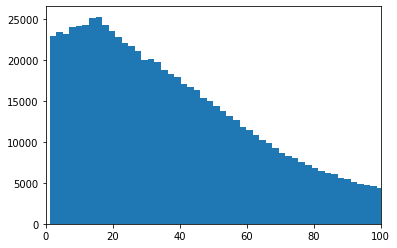

In [82]:
# from elephant.spike_train_generation import homogeneous_poisson_process
# from viziphant.statistics import plot_isi_histogram
# plot_isi_histogram(spiketrain, cutoff=250*pq.ms, histtype='bar')
# plt.show()

all_isis = [isi for sublist in ISI_neurons for isi in sublist]
plt.hist(all_isis, bins = 2000)
plt.xlim(0,100)
plt.show()

In [146]:
 #standard_FF_CV2_spCount(st, color)

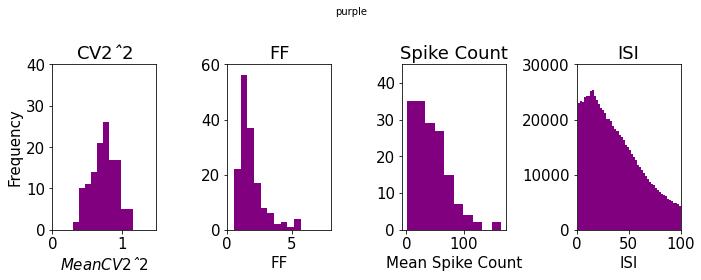

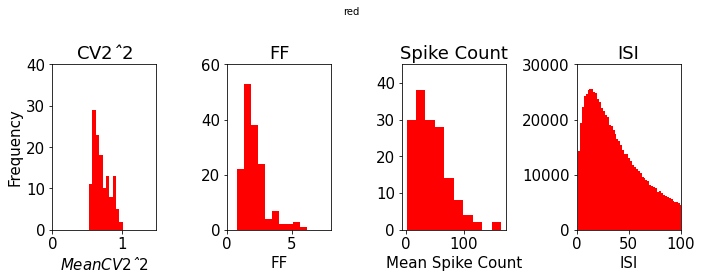

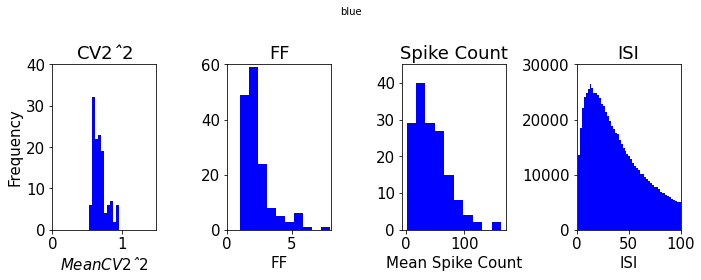

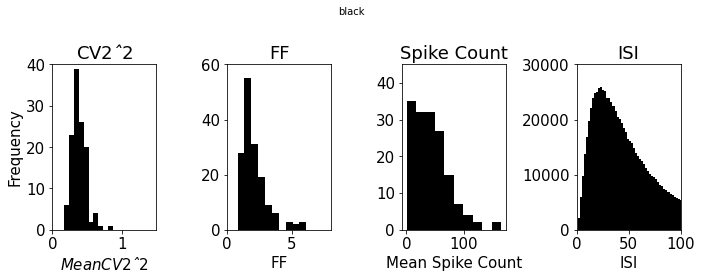

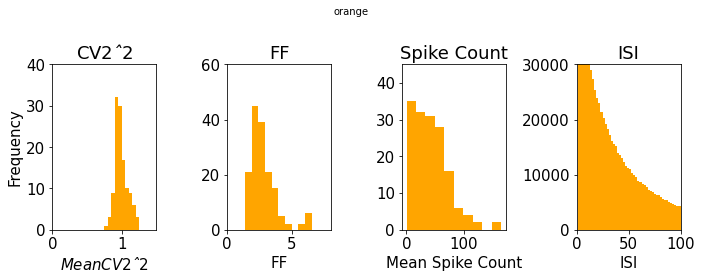

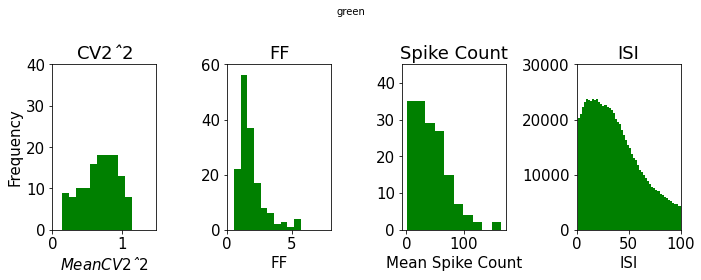

In [179]:
for k in range(len(colors)):
    st = st_list[k]
    color = colors[k]
    standard_FF_CV2_spCount(st, color)

In [69]:
print(val_list[0][-1].times.rescale('ms').magnitude) # Neuron 0, trial 1

[ 161.86666667 1313.9        1405.2        1561.7        1975.6
 2055.76666667 2241.9        2260.23333333 2277.9        2306.46666667
 2331.5        2333.6        2365.76666667 2400.7        2633.8
 2648.43333333 2715.9        2721.66666667 2746.9        2751.43333333
 2770.46666667 2810.73333333 2814.33333333 2816.46666667 2847.53333333
 2882.66666667 2975.23333333 3018.3        3525.93333333 3728.83333333
 3734.33333333 3804.66666667 3807.4        3816.7        3838.86666667
 3942.36666667]


In [ ]:
from elephant import statistics
def standard_FF_CV2_spCount(block, st_list):#st_list[n]
    key_list = list(st_list.keys())
    val_list = list(st_list.values())
    trial_ids = block.annotations['all_trial_ids']
    N_neurons = len(key_list)
    N_trials = len(trial_ids)
    ff = np.empty(N_neurons)
    sp_count = np.empty(( N_neurons,N_trials))
    CV2_mat = np.empty(( N_neurons,N_trials))#CV2 squared 
    for n in range(N_neurons):
        

    
    for t in range(N_trials):
        #print(len(block.segments[t].spiketrains[n].times.rescale('ms').magnitude))
        sp_count[n,t] = len(block.segments[t].spiketrains[n].times.rescale('ms').magnitude)
        ISI = np.diff(block.segments[t].spiketrains[n].times.rescale('ms').magnitude)
        ISI_trial[len(isi_trial):len(isi_trial)+len(ISI)] = ISI
        CV2_mat[n,t] = (statistics.cv2(block.segments[t].spiketrains[n].times.rescale('ms').magnitude))**2
            #print(CV2)
    sp_count_mean = np.mean(sp_count[n,:])
    ff_num = np.std(sp_count[n,:])   
    ff[n] = ff_num/sp_count_mean
          #Plotting CV2
    mean_CV2 = np.empty(N_neurons)
    for k in range(N_neurons):
        mean_CV2[k] = np.mean(CV2_mat[k,:])
    fig, ax = plt.subplots(1,4, figsize = [5,4])    
    ax.flatten()[0].hist(mean_CV2, color = 'k')
    ax.flatten()[0].set_xlabel('Mean CV2')
    ax.flatten()[0].set_ylabel('Frequency')
    ax.flatten()[0].set_title('CV2')
#     ax.flatten()[0].show()
    #Plot FF
    ax.flatten()[1].hist(ff)
    ax.flatten()[1].set_xlabel('FF')
    #ax.flatten()[1].set_ylabel('Frequency')
    ax.flatten()[1].set_title('FF')
    #plt.show()

    #Plot Spike count distribution
    mean_SpCount = np.empty(N_neurons)
    for k in range(N_neurons):
        mean_SpCount[k] = np.mean(sp_count[k,:])
    ax.flatten()[2].hist(mean_SpCount, color = 'r')
    ax.flatten()[2].set_xlabel('Mean Spike Count')
    #ax.flatten()[2].set_ylabel('Frequency')
    ax.flatten()[2].set_title('Spike Count')
    
    plt.suptitle(color)
    plt.tight_layout()
    plt.show()
    

In [35]:
from elephant import statistics
def compute_FF_CV2(block, color):
    trial_ids = block.annotations['all_trial_ids']
    #print(len(trial_ids))
    N_neurons = len(block.segments[0].spiketrains)
    #print(type(N_neurons))
    N_trials = len(trial_ids)
    ff = np.empty(N_neurons)
    sp_count = np.empty(( N_neurons,N_trials))
    CV2_mat = np.empty(( N_neurons,N_trials))
    ISI_mat = []
    #Compute the FF and CV2
    for n in range(N_neurons):
        
        isi_trial = []
        for t in range(N_trials):
            #print(len(block.segments[t].spiketrains[n].times.rescale('ms').magnitude))
            sp_count[n,t] = len(block.segments[t].spiketrains[n].times.rescale('ms').magnitude)
            ISI = np.diff(block.segments[t].spiketrains[n].times.rescale('ms').magnitude)
            ISI_trial[len(isi_trial):len(isi_trial)+len(ISI)] = ISI
#             m = 0
#             c = 0 
#             for l in range(len(ISI)-1):
#                 c += 1
#                 m += 2*np.abs(ISI[l] - ISI[l-1])/(ISI[l] + ISI[l-1])
#             if c != 0:     
#                 CV2 = m/c
            CV2_mat[n,t] = (statistics.cv2(block.segments[t].spiketrains[n].times.rescale('ms').magnitude))**2
                #print(CV2)
        sp_count_mean = np.mean(sp_count[n,:])
        ff_num = np.std(sp_count[n,:])   
        ff[n] = ff_num/sp_count_mean
        
      #Plotting CV2
    mean_CV2 = np.empty(N_neurons)
    for k in range(N_neurons):
        mean_CV2[k] = np.mean(CV2_mat[k,:])
    fig, ax = plt.subplots(1,3, figsize = [5,4])    
    ax.flatten()[0].hist(mean_CV2, color = 'k')
    ax.flatten()[0].set_xlabel('Mean CV2')
    ax.flatten()[0].set_ylabel('Frequency')
    ax.flatten()[0].set_title('CV2')
#     ax.flatten()[0].show()
    #Plot FF
    ax.flatten()[1].hist(ff)
    ax.flatten()[1].set_xlabel('FF')
    #ax.flatten()[1].set_ylabel('Frequency')
    ax.flatten()[1].set_title('FF')
    #plt.show()

    #Plot Spike count distribution
    mean_SpCount = np.empty(N_neurons)
    for k in range(N_neurons):
        mean_SpCount[k] = np.mean(sp_count[k,:])
    ax.flatten()[2].hist(mean_SpCount, color = 'r')
    ax.flatten()[2].set_xlabel('Mean Spike Count')
    #ax.flatten()[2].set_ylabel('Frequency')
    ax.flatten()[2].set_title('Spike Count')
    
    plt.suptitle(color)
    plt.tight_layout()
    plt.show()

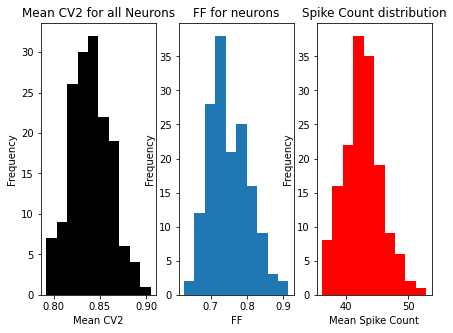

In [127]:


compute_FF_CV2(block)



In [36]:
#colors = [ 'black', 'blue', 'green', 'orange', 'purple', 'red']

for color in colors:
    block = eval(color)
    print(color)
    compute_FF_CV2(block, color)
    

purple


ValueError: Input size is too small. Please provide an input with more than 1 entry. Set 'with_nan' to True to replace the error by a warning.

In [12]:
orange.segments[0].spiketrains[0].annotations
orange.segments[0].spiketrains[0].annotations['channel_id']
block = orange
seg_idx = 1
# We can also use the FILTER FUNCTION
# Get the list of spiketrains of the selected trial
spiketrain = block.filter(
    targdict={'trial_id': seg_idx}, objects=neo.Segment)[0].spiketrains
# sts[0:10]
print(spiketrain)

[<SpikeTrain(array([0.02563333, 0.22616667, 0.2797    , 0.30053333, 0.30913333,
       0.3782    , 0.3821    , 0.44856667, 0.50406667, 0.50526667,
       0.50696667, 0.53833333, 0.54166667, 0.55323333, 0.59526667,
       0.62263333, 0.66623333, 0.6765    , 0.75963333, 0.80143333,
       0.94283333, 0.98423333, 1.18436667, 1.5371    , 1.64163333,
       1.73796667, 1.83213333, 1.8371    , 1.85143333, 1.9518    ,
       1.9946    , 2.0673    , 2.132     , 2.57043333, 2.5944    ,
       2.68493333, 2.70463333, 2.7642    , 2.78043333, 2.79093333,
       2.7998    , 2.83056667, 2.87006667, 2.8779    , 2.88046667,
       2.9069    , 2.91496667, 2.99376667, 3.15166667, 3.20706667,
       3.26073333, 3.36626667, 3.45156667, 3.4655    , 3.51993333,
       3.5783    , 3.58253333, 3.58556667, 3.58923333, 3.66766667,
       3.70026667, 3.7027    , 3.7112    , 3.723     , 3.7626    ,
       3.79486667, 3.81803333, 3.83376667, 3.83536667, 3.8389    ,
       3.87323333, 3.881     , 3.90743333, 3.9897

In [20]:
black.segments[3].spiketrains[0].annotations

{'unit_id': 2,
 'channel_id': 60,
 'connector_aligned_id': 38,
 'sua': True,
 'SNR': 3.95147219973,
 'spike_amplitude': 497.724793503,
 'trial_id_st': 21,
 'belong_to_trialtype': 'PGHF'}

In [17]:
block.segments[0].spiketrains.filter(targetdict = {'channel_id' : 27})

AttributeError: 'list' object has no attribute 'filter'

In [162]:
sts1[0].annotations

{'unit_id': 1,
 'channel_id': 10,
 'connector_aligned_id': 98,
 'sua': True,
 'SNR': 2.77264267241,
 'spike_amplitude': 300.522957868,
 'trial_id_st': 6,
 'belong_to_trialtype': 'PGHF'}

142
calculating UE ...


/opt/anaconda3/envs/ANDA/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/opt/anaconda3/envs/ANDA/lib/python3.8/site-packages/elephant/utils.py:290: UserWarning: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
  warnings.warn(f'Correcting {num_corrections} rounding errors by '


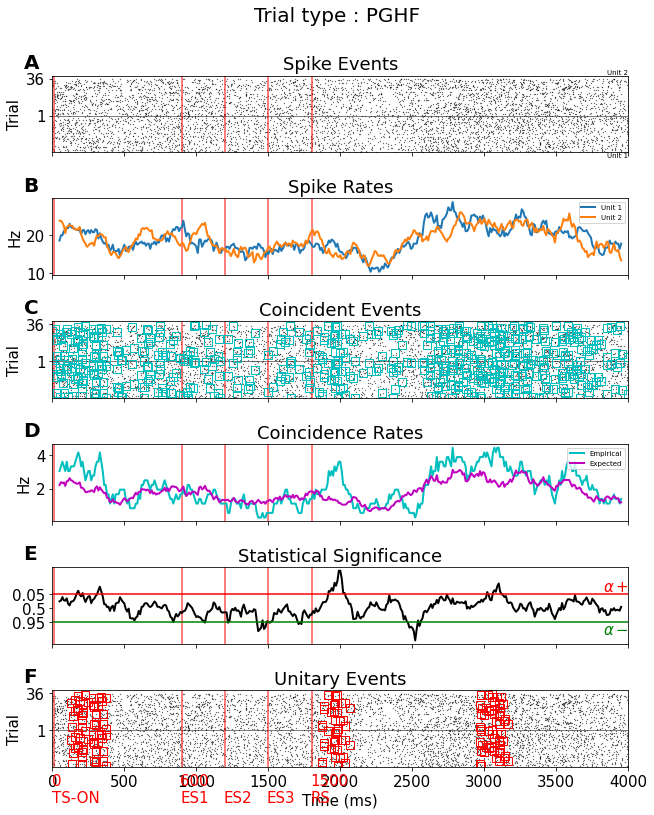

In [211]:
#UE with behavioral relavance

#Cell Katharina found = 93_1, index = 142
# Load data
import elephant.unitary_event_analysis as ue
from viziphant.unitary_event_analysis import plot_ue
N = 2
st = st_list[2]#Reference point
key_list = list(st.keys())
val_list = list(st.values())
sts1 = val_list[142]
print(len(sts1))
trial_type = 'PGHF'
sts1 = [st.time_slice(t_start = 0*pq.s,t_stop = 4*pq.s) for st in sts1 if st.annotations["belong_to_trialtype"] == trial_type ]
#sts1 = sts1.time_slice(0, 4)

st = st_list[0]
key_list = list(st.keys())
val_list = list(st.values())
sts2 = val_list[142]
sts2 = [st.time_slice(t_start = 0*pq.s,t_stop = 4*pq.s) for st in sts2 if st.annotations["belong_to_trialtype"] == trial_type ]

st = st_list[1]
key_list = list(st.keys())
val_list = list(st.values())
sts3 = val_list[142]
sts3 = [st.time_slice(t_start = 0*pq.s,t_stop = 4*pq.s) for st in sts3 if st.annotations["belong_to_trialtype"] == trial_type ]

st = st_list[3]
key_list = list(st.keys())
val_list = list(st.values())
sts4 = val_list[142]
sts4 = [st.time_slice(t_start = 0*pq.s,t_stop = 4*pq.s) for st in sts4 if st.annotations["belong_to_trialtype"] == trial_type ]

st = st_list[4]
key_list = list(st.keys())
val_list = list(st.values())
sts5 = val_list[142]
sts5 = [st.time_slice(t_start = 0*pq.s,t_stop = 4*pq.s) for st in sts5 if st.annotations["belong_to_trialtype"] == trial_type ]

st = st_list[5]
key_list = list(st.keys())
val_list = list(st.values())
sts6 = val_list[142]
sts6 = [st.time_slice(t_start = 0*pq.s,t_stop = 4*pq.s) for st in sts6 if st.annotations["belong_to_trialtype"] == trial_type ]
# filename_neuron1 = 'Data14'
# filename_neuron2 = 'Data15'
# sts1 = misc.load(f'{DATA_PATH}/{filename_neuron1}.npy')['st']
# sts2 = misc.load(f'{DATA_PATH}/{filename_neuron2}.npy')['st']
spiketrain = np.vstack((sts1,sts5)).T #,sts3,sts4,sts5,sts6

# Parameters for unitary events analysis
winsize = 100*pq.ms
binsize = 5*pq.ms
winstep = 10*pq.ms
pattern_hash = [3]
significance_level = 0.05

# Run unitary event analysis
print('calculating UE ...')
method = 'analytic_TrialAverage'
UE = ue.jointJ_window_analysis(spiketrain, bin_size=binsize, win_size=winsize,
                               win_step=winstep, pattern_hash=pattern_hash,
                               method=method, n_surrogates=100)

# Plot UE using Viziphant

plot_params = {
    'events':{'0\nTS-ON':[0.01*1000*pq.ms], '600\nES1':[900*pq.ms], 'ES2':[1200*pq.ms],
              'ES3':[1500*pq.ms], '1500\nRS': [1800*pq.ms]},
    'unit_real_ids': range(1, N+1),                                                                                                
    'hspace': 0.6,
    'figsize': (10, 12),
    'fsize': 15,
    'ms': 8,
    'lw': 2,
    'suptitle': f'Trial type : {trial_type} '
}

ue_plots = plot_ue(spiketrain, UE, significance_level=significance_level,
                   **plot_params)


In [201]:
list(st.keys()).index("93_1")
#print(st.keys().index("91_3"))
# print(np.where(st['91_3']))

146

In [ ]:
(array([0.01      , 0.41226667, 0.81266667, 1.1144    , 2.11633333,
        2.33336667, 2.65036667, 2.67936667, 2.72536667, 2.81936667,
        2.97736667, 3.24936667, 3.28436667, 3.5714    , 3.57143333,
        3.75836667, 3.99336667]) * s,
 {'trial_id': array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]),
  'belongs_to_trialtype': array(['PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF',
         'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF', 'PGHF',
         'PGHF'], dtype='<U4'),
  'trial_event_labels': array(['TS-ON', 'WS-ON', 'CUE-ON', 'CUE-OFF', 'GO-ON', 'SR', 'OT', 'DO',
         'FSRplat-ON', 'HEplat-ON', 'FSRplat-OFF', 'HEplat-OFF', 'RW-ON',
         'RW-OFF', 'STOP', 'OBB', 'OR'], dtype='<U11')})